**Prepared by: Tim Hayes**

**Cohort: AI-DL-JUL''23**'

# Introduction to Neural Networks: Bank Churn prediction

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary:

* Rownnumber: Unique ID of row

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer
 
* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location 
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer 
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary 

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values 
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np
# Library to split data
from sklearn.model_selection import train_test_split, KFold
# Library to encode the variables
from sklearn import preprocessing
# To plot confusion matrix
from sklearn.metrics import confusion_matrix
# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
# library to import to standardize the data
from sklearn.preprocessing import StandardScaler
#To import different metrics 
from sklearn import metrics
from sklearn.utils import class_weight
from tensorflow.keras import backend
# Library to avoid the warnings
import warnings
warnings.filterwarnings("ignore")
# importing different functions to build models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization, Activation
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import tensorflow as tf
# importing GridSearch CV
from sklearn.model_selection import GridSearchCV
# importing roc_curve to plot
from sklearn.metrics import roc_curve
from matplotlib import pyplot
# importing SMOTE
from imblearn.over_sampling import SMOTE
# importing metrics
from sklearn import metrics
import random
#Importing classback API
from keras import callbacks
from kerastuner.tuners import RandomSearch, GridSearch
import keras_tuner as kt
from kerastuner.engine.hyperparameters import HyperParameters

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD, RMSprop


# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)
from tensorflow.keras import regularizers
import shap

In [2]:
# Seed for reproducibility
seed = 42

In [3]:
# Set tensorflow to only announce errors
tf.get_logger().setLevel('ERROR')

## Useful Graphical functions

In [4]:
def output_pretty_boxplot(df, x, y=None, hue=None, figsize=None, title=None, order=None, rotate_x=False):
    '''Output a customized nice looking standardized boxplot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :y: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default to nNone
        :figsize: The figurare size tuple to use in the plot default is None
        :title: the title desired in the plot default is Boxplot: {x} vs {y}'
        :order: boxplot order default is none'
        :rotate_x: rotate x axis text default is false'
    ''' 
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(10,3);      
        
    plt.figure(figsize=figsize);

    if (rotate_x):
        plt.xticks(rotation=45);
        
    if (title is None):
        title = 'Boxplot: {}'.format(x);
        
        if (y is not None):
            title += ' vs {}'.format(y);
            
        if (hue is not None):
            title += ' with a hue of {}'.format(hue);

    # Output boxplot with variables
    sns.boxplot(data=df,x=x, y=y, showmeans=True, hue=hue, order=order);

    plt.title(title);  
    plt.show();
    
def output_pretty_countplot(df, x, order=None, hue=None, figsize=None, title=None):
    '''Output a customized nice looking standardized countplot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :order: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default is None
        :figsize: The figure size tuple to use in the plot default is None
        :title: The title to use default is Countplot: for {}
    ''' 
    
    if (title is None):
        title = 'Countplot: for {}'.format(x)
    
        if (hue is not None):
            title += ' with hue of {}'.format(hue)
        
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(15,3.5);
        
    plt.figure(figsize=figsize);
        
    plt.xticks(rotation=45);
    plt.rcParams["figure.figsize"] = [7.0, 3.5]
    plt.rcParams["figure.autolayout"] = True
       
    # Ouput count plot
    ax = sns.countplot(data=df,x=x,order=order,hue=hue);           
        
    # output the amounts on top of the bars
    for p in ax.patches:
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() + (p.get_height()*0.01)
        value = '{:.1f}'.format(p.get_height())
        
        if (pd.isna(x) or pd.isna(y) or pd.isna(value)):
            continue
  
        ax.text(x, y, value, ha="center")

    plt.title(title);
    plt.show();
    
def output_pretty_histplot(df, x, title=None):
    '''Output a customized nice looking standardized histplot
        :title: the title desired in the plot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :title:
    '''
       
    plt.figure(figsize=(10,3));
    sns.histplot(data=df,x=x,kde=True);
    
    if (title is None):
        title = 'Histplot: for {}'.format(x);
        
    plt.title(title);
    plt.show();
    
def output_pretty_barplot(df, x, y, order=None, hue=None, title=None, figsize=None):
    '''Output a customized nice looking standardized barplot
        :df: DataFrame to use
        :x: The x axis variable to use in the plot
        :y: The y axis variable to use in the plot
        :order: The y axis variable to use in the plot default is None
        :hue: The hue variable to use in the plot default is None
        :title: the title desired in the plot default is None
        :figsize: The figure size tuple to use in the plot default is None
    ''' 

    if (title is None):
        title = 'Barplot: for {} vs {}'.format(x, y);
      
    if (figsize is None):
        figsize=(12,5);
          
    # setting the dimensions of the plot
    fig, ax = plt.subplots(figsize=figsize)
 
    sns.barplot(data=df, x=x, y=y,hue=hue, errwidth=0, ax=ax)
    
    for i in ax.containers:
        ax.bar_label(i,)
    
    plt.title(title);
    plt.xticks(rotation=45);

def output_pretty_crosstab_plot(title, x, y, figsize=None, cmap='Accent'):
    '''Output a customized nice looking standardized crosstab barplot
        :title: the title desired in the plot
        :x: The x data to use in the plot
        :y: The y data to use in the plot in the plot
        :figsize: Figure size to use default is 12,5
        :cmap: Colormap to use default is BrBG
    ''' 
    
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(12,5);
               
    crosstab_percentages = pd.crosstab(x, y, normalize='index')
           
    crosstab_percentages.plot(kind='bar',stacked=True, figsize=figsize, colormap=cmap)
        
    plt.legend()
           
    plt.title(title);
    plt.xticks(rotation=45);
    plt.show()
    return crosstab_percentages

def output_pretty_numeric_plots(df, feature, title_suffix=''):
    '''Output a customized boxplot and histplot
    :df: DataFrame to use
    :feature: the feature to plot
    :title_suffix: title suffix to append, default is ''
    ''' 
    print(df[feature].describe())
    output_pretty_boxplot(df, feature);
    output_pretty_histplot(df, feature, title='Histplot: for {}{}'.format(feature, title_suffix));
    
def distribution_plot_wrt_target(df, predictor, target):
    '''Output a customized distribution for two cases of target along with matching boxplots for each case
    :df: DataFrame to use
    :predictor the feature to plot
    :target: Target variabel
    ''' 
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = df[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=df[df[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=df[df[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=df, x=target, y=predictor, ax=axs[1, 0], showmeans=True)

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=df,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        showmeans=True
    )

    plt.tight_layout()
    plt.show()

def output_pretty_scatterplot(df, x, y, hue=None, figsize=None):
    '''Output a customized nice looking standardized scatterplot
        :df: DataFrame to use
        :x: The x data to use in the plot
        :y: The y data to use in the plot in the plot
        :hue: Hue to employ default i None
        :figsize: Figure size to use default is 15,5
    '''
    
    # Use default figsize if not provided
    if (figsize is None):
        figsize=(15,5)
                 
    plt.figure(figsize=(15, 5));
    ax = sns.scatterplot(data=df, x=x, y=y, hue=hue);

    title = 'Scatterplot: {} vs {}'.format(x,y)
    if (hue is not None):
            title += ' with hue of {}'.format(hue)
    
    plt.title(title);
        
    plt.show();

    
def make_confusion_matrix(cf,count=True,percent=True,cbar=True,xyticks=True,
                          xyplotlabels=True,figsize=None,cmap='Blues',title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''

    group_names = ['True Negative','False Positive','False Negative','True Positive']
    categories = [ 'Not_Exited','Exited']

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)
        
        
def model_performance_classification(model, x, y, breakpoint=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    x: independent variables
    y: dependent variable
    breakpoint: Threshold to use for predictions defaults to .5
    """

    # predicting using the independent variables
    predictions = model.predict(x)
    y_pred = (predictions > breakpoint)

    acc = accuracy_score(y, y_pred)  # to compute Accuracy
    recall = recall_score(y, y_pred)  # to compute Recall
    precision = precision_score(y, y_pred)  # to compute Precision
    f1 = f1_score(y, y_pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

def output_loss(history):
    '''Output loss curve
        :history: History results from fit
    '''   
    plt.plot(history.history['loss'], label='Train');
    plt.plot(history.history['val_loss'], label='Validation');
    plt.title('Model Loss');
    plt.ylabel('Loss');
    plt.xlabel('Epoch');
    plt.legend();
    plt.show();
    
def output_pretty_roc(y_train, predictions, hide_annotation = False, title_prefix='Training'):
    """
    Plot a ROC curve

    y_train: dependent variable
    predictions: prediction from the model
    hide_annotation: hide the optimal threshold value for TPR/FPR default is False
    title_prefix: Prefix to add to title defaults to Training
    """
    optimal_threshold_auc_roc = 0.0;
    logit_roc_auc_train = roc_auc_score(y_train, predictions);
    fpr, tpr, thresholds = roc_curve(y_train, predictions);
    plt.figure(figsize=(7, 5));
    plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train);
    
    # Do we show the optimal threshold?
    if (hide_annotation == False):
        optimal_idx = np.argmax(tpr - fpr);
        x = fpr[optimal_idx];
        y = tpr[optimal_idx];
        plt.plot(x, y, "-v");
        optimal_threshold_auc_roc = thresholds[optimal_idx];
        plt.text(x*.6, y*1.08, 'Optimal {:.3f}'.format(optimal_threshold_auc_roc));
    
    plt.plot([0, 1], [0, 1], "r--");
    plt.xlim([0.0, 1.0]);
    plt.ylim([0.0, 1.05]);
    plt.xlabel("False Positive Rate");
    plt.ylabel("True Positive Rate");
    plt.title("Receiver operating characteristic for {}".format(title_prefix));
    plt.legend(loc="lower right");
    plt.show();
    
    return optimal_threshold_auc_roc

## Useful Utility functions

In [5]:
def set_seed(seed):
    # Set the random seed for reproducibility
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

## Useful Modeling Functions

In [6]:
   class INNHyperModelDropout(kt.HyperModel):
    """
    INNHyperModel class to build/fit with configurable hyperparameters to tune dropout, num_layers, batch_size
    and Adam learning rate
    """
    # Ctor
    def __init__(self, max_neurons=128):
        self.max_neurons = max_neurons
        
    # build method
    def build(self, h):
        model = Sequential()
        for i in range(h.Int('num_layers', 2, 10)):
            model.add(Dense(units=h.Int('units_' + str(i), min_value=16, max_value=self.max_neurons,step=32),
                                        kernel_initializer='he_uniform', activation='relu'))
                
            dropout_rate = h.Choice('dropout_rate', [0.1, 0.2, 0.3, 0.4])
            model.add(Dropout(dropout_rate))
            
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=Adam(h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                    loss='binary_crossentropy', metrics=['accuracy'])

        return model
    
    # fit method
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(*args,batch_size=hp.Choice("batch_size", [8, 16, 32, 64]),**kwargs,)

class INNHyperModelReg(kt.HyperModel):
    """
    INNHyperModel class to build/fit with configurable hyperparameters to tune L1/L2 regularization, num_layers
    batch_size and Adam Learning Rate
    """
    # Ctor
    def __init__(self, l2=True, max_neurons=128):
        # Default to using L2 (Ridge) regularizer
        self.l2 = l2
        self.max_neurons = max_neurons
        self.batch_size = -1
        
    # build method
    def build(self, h):
        model = Sequential()
        
        for i in range(h.Int('num_layers', 2, 10)):
            if (self.l2):
                l2 = h.Choice('reg2_learning_rate', [1e-2, 1e-3, 1e-4])
                regularizer = regularizers.L2(l2)
            else:
                l1 =  h.Choice('reg1_learning_rate', [1e-2, 1e-3, 1e-4])
                l2 =  h.Choice('reg2_learning_rate', [1e-2, 1e-3, 1e-4])
                regularizer = regularizers.L1L2(l1, l2)

            model.add(Dense(units=h.Int('units_' + str(i), min_value=16, max_value=self.max_neurons,step=32),
                                        kernel_initializer='he_uniform', activation='relu',
                                        kernel_regularizer=regularizer))
                
            
            model.add(BatchNormalization())
            
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer=Adam(h.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
                    loss='binary_crossentropy', metrics=['accuracy'])

        return model
    
    # fit method
    def fit(self, hp, model, *args, **kwargs):
        return model.fit(*args,batch_size=hp.Choice("batch_size", [8, 16, 32, 64]),**kwargs,)
    
def get_keras_tuner(hypermodel, directory):
    """
    Function to generate a keras tuner
    
    hyprmodel: hypermodel to use
    """
    tuner = RandomSearch(hypermodel, objective='val_accuracy', max_trials=5,\
                         executions_per_trial=3, project_name=directory)
    
    print(tuner.search_space_summary())
    
    return tuner

def get_hypermodel_cv(hypermodel, X_train, y_train, X_val, y_val, directory, class_weight=None):
    '''
    Get a hypermodel using crossvalidation
    :X_train: Training for  independent variables
    :y_train: Training for dependent variable
    :X_val: Validation for independent variables
    :y_val: Validation for dependent variable
    :directory: Directory to store model info
    :class_weight: Optional class weights set to None by default
    ''' 
    # Define the cross-validation split
    kf = KFold(n_splits=5, shuffle=True, random_state=seed)

    # Initialize an empty list to store the models and their performance
    models = []
    val_accuracies = []

    for train_index, val_index in kf.split(X_train):
        # Split the data into training and validation sets for this fold
        X_train_fold, X_val_fold = X_train.iloc[train_index], X_train.iloc[val_index]
        y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]

        # Get a Keras tuner
        tuner = get_keras_tuner(hypermodel, directory)

        # Perform the RandomSearch on the current fold's data optionally using class_weight
        if (class_weight is None):
            tuner.search(X_train_fold, y_train_fold, epochs=10, validation_data=(X_val_fold, y_val_fold))
        else:
            tuner.search(X_train_fold, y_train_fold, epochs=10, validation_data=(X_val_fold, y_val_fold),
                        class_weight=class_weight)
            
        # Get the best model from this fold's search
        best_model = tuner.get_best_models(num_models=1)[0]

        # Evaluate the best model on the validation set for this fold
        val_loss, val_accuracy = best_model.evaluate(X_val_fold, y_val_fold)

        # Append the model and its performance to the lists
        models.append(best_model)
        val_accuracies.append(val_accuracy)

    # Find the best model based on cross-validation performance
    best_model_index = val_accuracies.index(max(val_accuracies))
    best_model = models[best_model_index]
    
    return best_model, tuner.get_best_hyperparameters()[0]

def build_basic_model(dropout_rate=None):
    '''
    Build a basic model with optional dropout
    :dropout_rate: Optional class weights set to None by default
    ''' 
    # Clear the session before modelling
    backend.clear_session()
    # Initializing the ANN
    model = Sequential()
    # Add an input layer and a dense layer with 64 neurons
    model.add(Dense(activation = 'relu', input_dim = X_train.shape[1], units=64))
    
    # Add an optional dropout
    if (dropout_rate is not None):
        model.add(Dropout(dropout_rate))
        
    # Add hidden layer with 32 neurons
    model.add(Dense(32, activation='relu'))
    
    # Add an optional dropout
    if (dropout_rate is not None):
        model.add(Dropout(dropout_rate))
        
    # Add an output layer which represents a binary classification of not churn or churn (0 or 1)
    model.add(Dense(1, activation = 'sigmoid'))
    
    return model



def make_classification_report(model, x, y, title_suffix='Test', threshold=0.5):
    '''
    Build classification report
    :model: model
    :x: Independent variables
    :y: Dependent variables
    :title_suffix: Suffix to append to title
    :threshold: Optional threshold set to 0.5 by default
    '''     

    # Get our predictions
    predictions = model.predict(x)
        
    #Let's predict using the threshold
    y_pred = (predictions > threshold)
    cr = metrics.classification_report(y, y_pred, output_dict=True)
    df_classification = pd.DataFrame(cr).transpose()
        
    # Add a nice title to the classification report
    df_classification = df_classification.style.set_caption('Classification report for {}'.format(title_suffix))\
                                                 .set_table_styles([{
                                                     'selector': 'caption',
                                                     'props': 'text-align: center;font-size: 1.5em;font-weight:bold;'
                                                 }], overwrite=False)
        
    display(df_classification)

        
def make_roc_curve(model, x, y):
    '''
    Output a AUC-ROC curve
    :model: Optional class weights set to None by default
    :x: Independent variables
    :y: Dependent variables
    '''     
    predictions = model.predict(x)             
    optimal_threshold_auc_roc = output_pretty_roc(y, predictions);
    return optimal_threshold_auc_roc
    
def make_confusion_matrix_with_roc(model, x, y, optimal_threshold_auc_roc, 
                                   title_prefix='Validation'):
    '''
    Output confusion matrix with and without ROC threshold
    :model: Model
    :x: Independent variables
    :y: Dependent variables
    :optimal_threshold_auc_roc: ROC threshold
    :title_prefix: Pre to prepend to title
    '''   

    ## Lets make predictions to generate a confusion matrix
    predictions = model.predict(x)

    #Let's predict using default threshold
    y_pred = (predictions > 0.5)         
    cm = confusion_matrix(y, y_pred);
    make_confusion_matrix(cm, title='{} Confusion Matrix'.format(title_prefix))
        
    #Let's predict using default threshold
    y_pred = (predictions > optimal_threshold_auc_roc)
    cm = confusion_matrix(y, y_pred);
    make_confusion_matrix(cm, title='{} Confusion Matrix With ROC'.format(title_prefix));

In [7]:
## Set the seed for reproducibility
set_seed(seed)
verbose = 1

## Loading the dataset

- Observations
- Sanity checks

In [8]:
# Load the churn dataset
data = pd.read_csv("Churn.csv")
df = data.copy()

## Data Overview

In [9]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


#### Observations
- RowNumber and CustomerId appear to contain unique values.
- IsActiveMember, HasCrCard and Exited appear to be columns with boolean values (1/0).
- CreditScore, Age, Tenure, Balance, NumOfProducts and EstimatedSalary appear to be numerical columns.

In [11]:
# Use shape() to get the dimensions of the dataframe
df_shape = df.shape
print("DataFrame has {} rows and {} columns".format(df_shape[0], df_shape[1]))

DataFrame has 10000 rows and 14 columns


#### Observations
- DataFrame has 10000 rows and 14 columns

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


#### Observations
- There are 2 float values in the dataset
- There are 9 int values in the dataset.
- There are 3 object values in the dataset.

In [13]:
# Check for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Observations
- There are no missing values in the dataset.

In [14]:
# See if we have an duplicated data
print('Rows of duplicated data in the dataset {}'.format(df.duplicated().sum()))

Rows of duplicated data in the dataset 0


#### Observations
- There are no duplicated values in the dataset.

In [15]:
# Use describe() to get a statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


#### Observations
- Min value for CreditScore is 350.000 and max is 850.000
- Mean for CreditScore is 650.529 which is less than the median indicating the data is left skewed.


- Min value for Age is 18.000 and max is 92.000
- Mean for Age is 38.922 which is greater than the median indicating the data is right skewed.


- Min value for Tenure is 0.000 and max is 10.000
- Mean for Tenure is 5.013 which is greater than the median indicating the data is right skewed.


- Min value for Balance is 0.000 and max is 250898.090
- Mean for Balance is 76485.889 which is less than the median indicating the data is left skewed.


- Min value for NumOfProducts is 1.000 and max is 4.000
- Mean for NumOfProducts is 1.530 which is greater than the median indicating the data is right skewed.


- Min value for HasCrCard is 0.000 and max is 1.000
- Mean for HasCrCard is 0.706 which is less than the median indicating the data is left skewed.


- Min value for IsActiveMember is 0.000 and max is 1.000
- Mean for IsActiveMember is 0.515 which is less than the median indicating the data is left skewed.


- Min value for EstimatedSalary is 11.580 and max is 199992.480
- Mean for EstimatedSalary is 100090.240 which is less than the median indicating the data is left skewed.


- Min value for Exited is 0.000 and max is 1.000
- Mean for Exited is 0.204 which is greater than the median indicating the data is right skewed.

In [16]:
# Use describe() to get a statistical summary
df.describe(include=object).T

,count,unique,top,freq
Surname,10000,2932,Smith,32
Geography,10000,3,France,5014
Gender,10000,2,Male,5457


#### Observations
- Surname has 2932 unique items the most prevalent is Smith.
- Geography has three unique items the most prevalent is France.
- Gender has two unique items the most prevalent being Male.

#### Unique values

In [17]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [18]:
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


#### Observations
- Surname has 2932 unique items the most prevalent is Smith.
- CreditScore has 460 unique values.
- Geography has three unique items the most prevalant is France.
- Gender has two unique items the most prevalant being Male.
- Age has 70 unique values
- Tenure has 11 unique values.
- Balance has 6382 unique values.
- NumOfProducts has 4 unique values.
- HasCrCarc, IsActiveMember and Exited have two unique values.
- EstimatedSalary has 9999 unique values.

### Drop unnecessary columns

In [19]:
# Drop RowNumber , CustomerId and Surname since they are unique and add no value to this analysis
df.drop(['CustomerId', 'RowNumber', 'Surname'], axis=1, inplace=True)

## Exploratory Data Analysis

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?
2. How many active members are there with the bank?
3. How are the different customer attributes correlated to each other?
4. Who is churning more when compared to males and females?  
5. Customers from which geographical part are churning more?

### Outlier Detection 

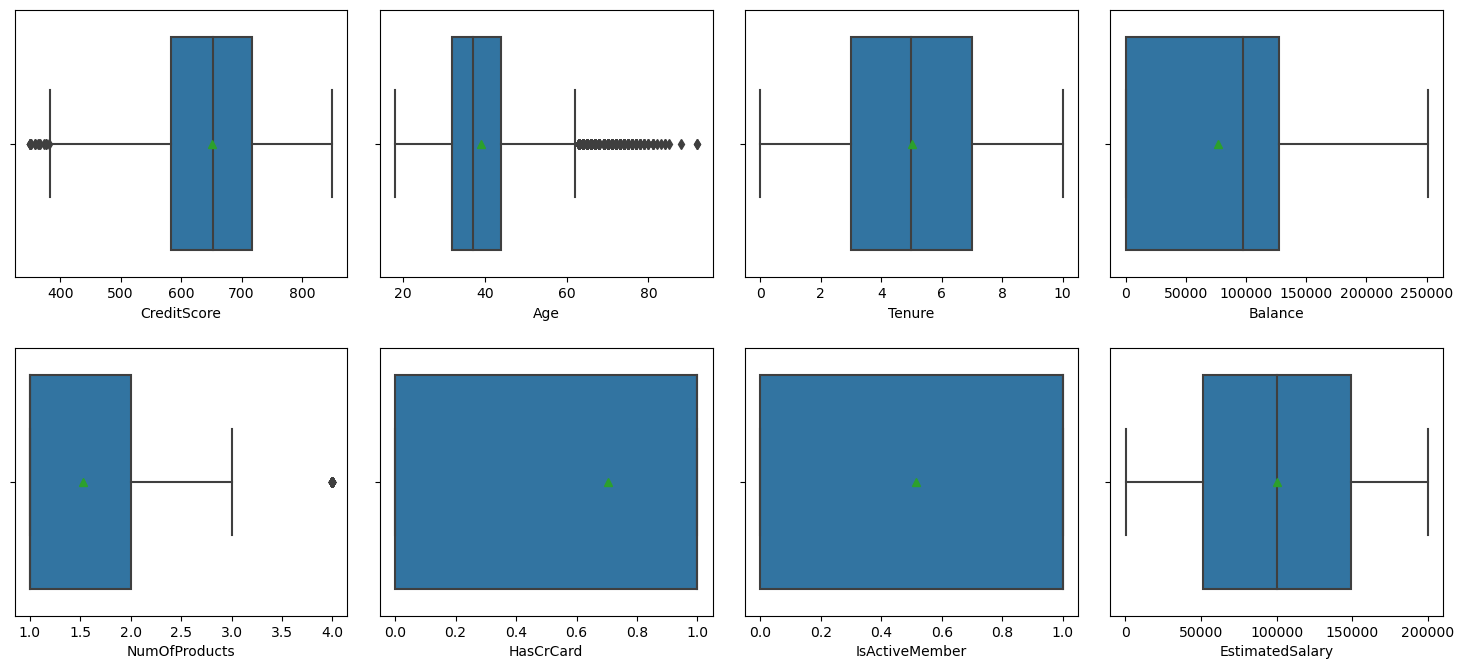

In [20]:
# outlier detection using boxplot
num_cols = df.select_dtypes(include=np.number).columns
num_cols = [x for x in num_cols.tolist() if x != 'Exited']

plt.figure(figsize=(15, 10))

for i, variable in enumerate(num_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df, x=variable, showmeans=True)
    plt.tight_layout(pad=2)

plt.show()

#### Observations
- CreditScore, Age and NumOfProducts have outliers.
- There is no evidence that the outliers are extraordinary and thus the outliers will not be treated.

## Univariate Analysis

### 1. What is the distribution of the credit score of customers? Are there any noticeable patterns or outliers in the distribution?

count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64


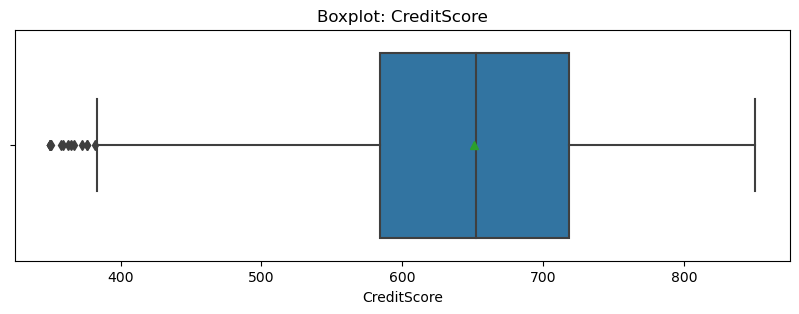

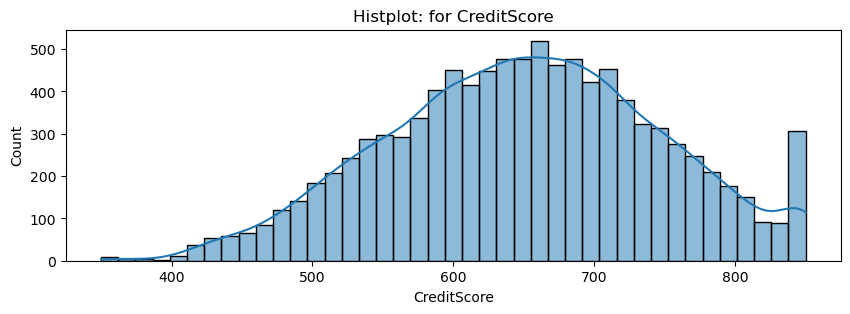

In [21]:
# Boxplot and Histplot for CreditScore
output_pretty_numeric_plots(df, 'CreditScore')

#### Observations
- Min for CreditScore is 350.0 and max is 850.0.
- Mean for CreditScore is 650.5288 which is less than the median indicating a left skew in the data.
- Distribution has one large peak at around 840.
- Distribution has outliers.

### Let's investigate Credit Score categories

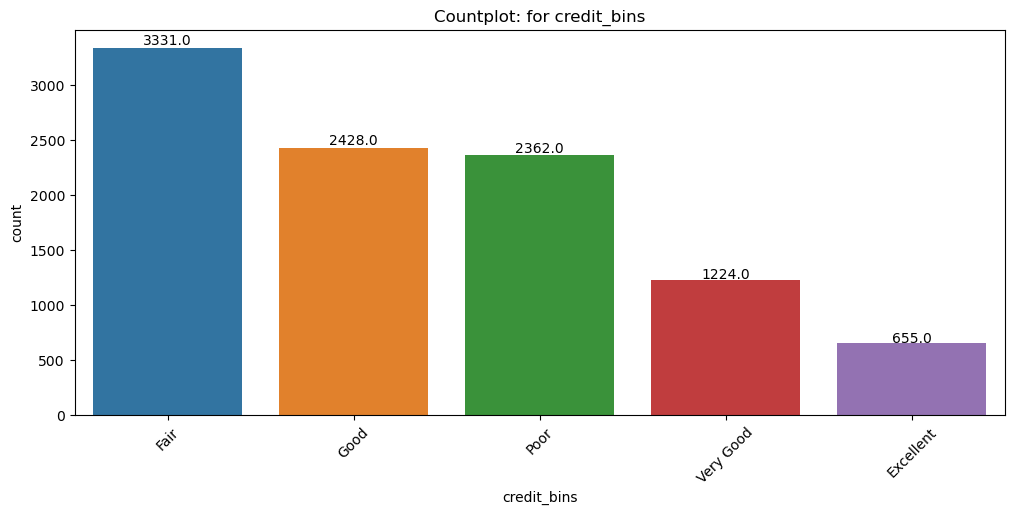

Fair         0.3331
Good         0.2428
Poor         0.2362
Very Good    0.1224
Excellent    0.0655
Name: credit_bins, dtype: float64

In [22]:
# Credit Score Ranges extracted from https://www.equifax.com/personal/education/credit/score/credit-score-ranges/
df['credit_bins'] = pd.cut(df['CreditScore'], [300, 579, 669,739, 799, 850], 
                           labels=['Poor', 'Fair', 'Good', 'Very Good', 'Excellent'])
# Countplot for credit_bins
output_pretty_countplot(df, 'credit_bins', \
                        order=df['credit_bins'].value_counts().index,\
                        figsize=(12,5))
df['credit_bins'].value_counts(normalize=True)

#### Observations
- 33% of the customers at the Bank are considered Fair risk according to https://www.equifax.com/personal/education/credit/score/credit-score-ranges/ and 23.62% are considered Poor risked individuals.
- 18% of the banks customers are considered a Very Good or Excellent risk.

### Let's investigate Geography

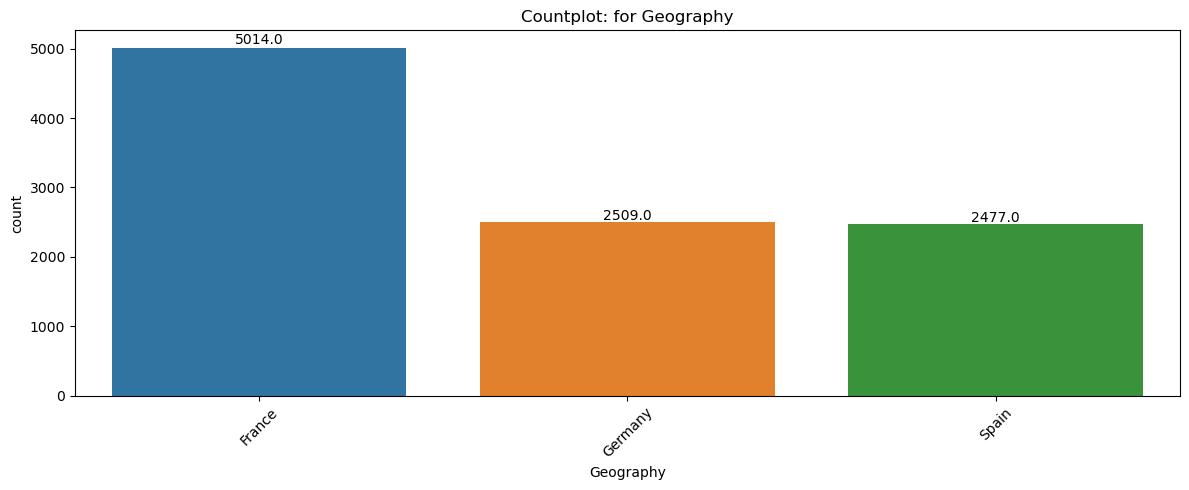

France     0.5014
Germany    0.2509
Spain      0.2477
Name: Geography, dtype: float64

In [23]:
# Countplot for Geography
output_pretty_countplot(df, 'Geography', \
                        order=df['Geography'].value_counts().index,\
                        figsize=(12,5))
df['Geography'].value_counts(normalize=True)

#### Observations
- The bulk of the individuals in the dataset come from France (50.14%).
- The country with the lowest representation in the dataset is Spain with 24.7% just slightly lower than Germany. 

### Let's investigate Age

count    10000.000000
mean        38.921800
std         10.487806
min         18.000000
25%         32.000000
50%         37.000000
75%         44.000000
max         92.000000
Name: Age, dtype: float64


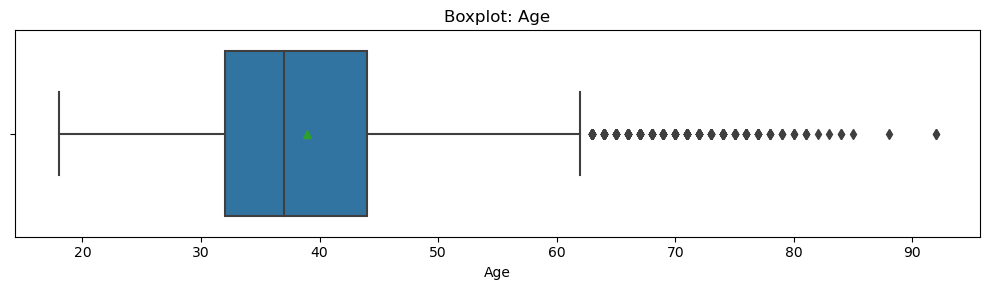

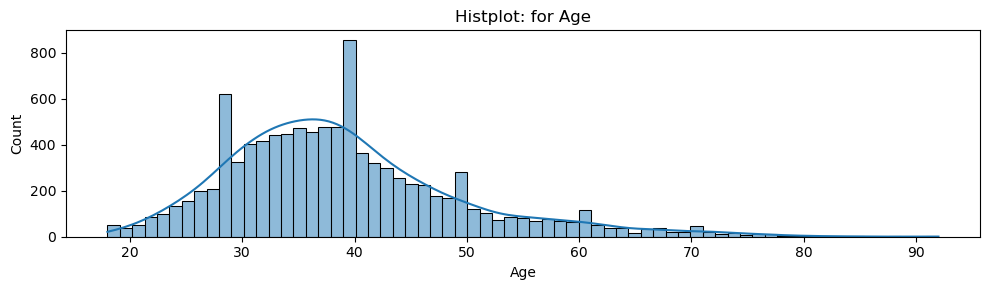

In [24]:
# Boxplot and Histplot for Age
output_pretty_numeric_plots(df, 'Age')

#### Observations
- Min for Age is 18.0 and max is 92.0.
- Mean for Age is 38.9218 which is greater than the median indicating a right skew in the data.
- There are two peaks in the Age distribution at and 40 and 28.
- Age distribution has outliers.

### Let's investigate Tenure

count    10000.000000
mean         5.012800
std          2.892174
min          0.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         10.000000
Name: Tenure, dtype: float64


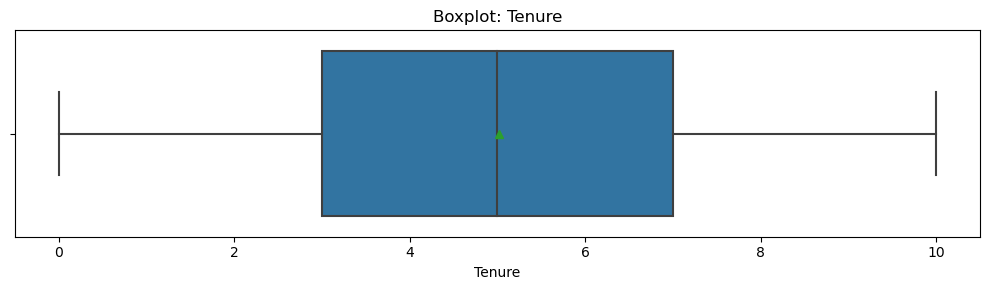

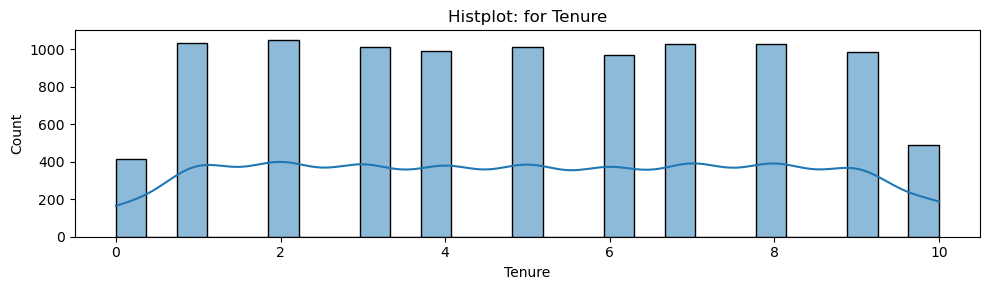

In [25]:
# Boxplot and Histplot for Tenure
output_pretty_numeric_plots(df, 'Tenure')

#### Observations
- Min for Tenure is 0.0 and max is 10.0.
- Mean for Tenure is 5.0128 which is greater than the median indicating a right skew in the data

### Let's investigate Balance

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64


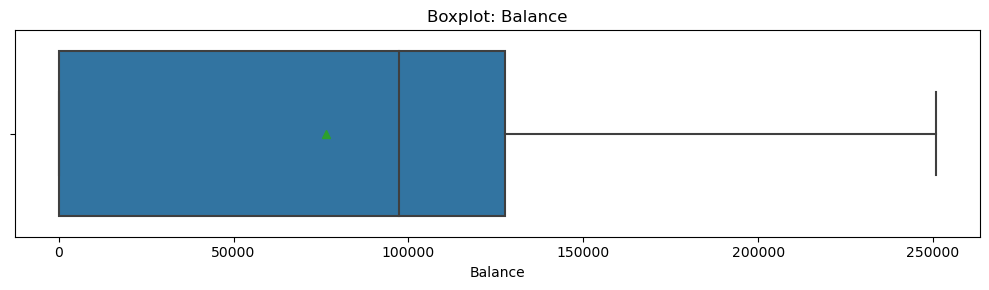

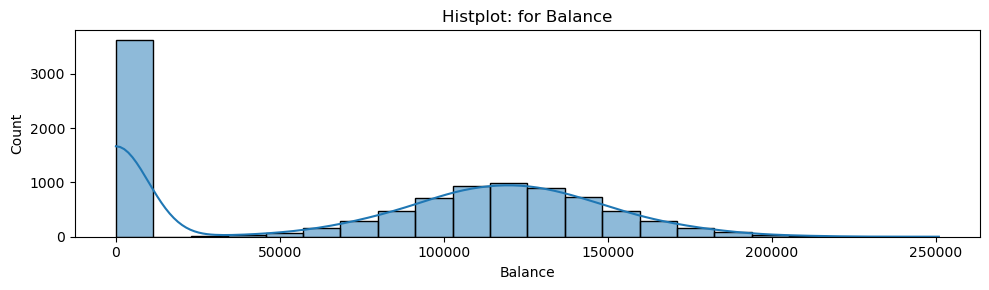

In [26]:
# Boxplot and Histplot for Balance
output_pretty_numeric_plots(df, 'Balance')

#### Observations
- Min for Balance is 0.0 and max is 250898.09.
- Mean for Balance is 76485.889288 which is less than the median indicating a left skew in the data.
- There is a large unusual peak of approximately 3600 customers with a balance of 0.

### Let's investigate NumOfProducts

count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64


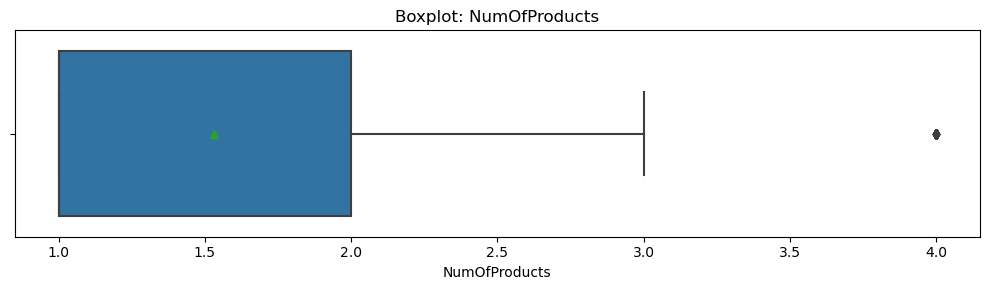

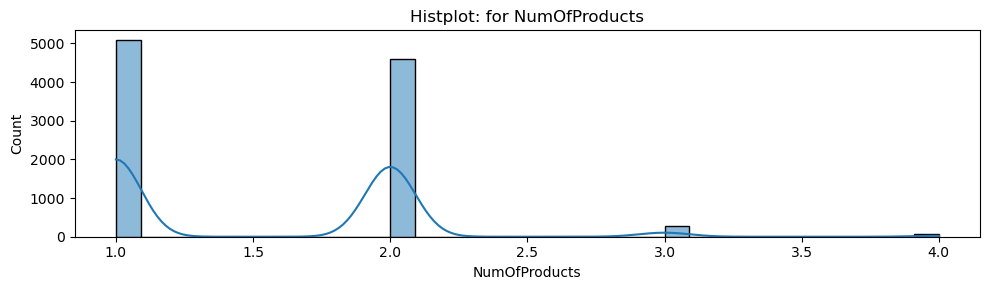

In [27]:
# Boxplot and Histplot for NumOfProducts
output_pretty_numeric_plots(df, 'NumOfProducts')

#### Observations
- Min for NumOfProducts is 1.0 and max is 4.0.
- Mean for NumOfProducts is 1.5302 which is greater than the median indicating a right skew in the data.
- The majority of the customers have a NumOfProduct of 1.
- NumOfProducts distribution has outliers.

### Let's investigate HasCrCard

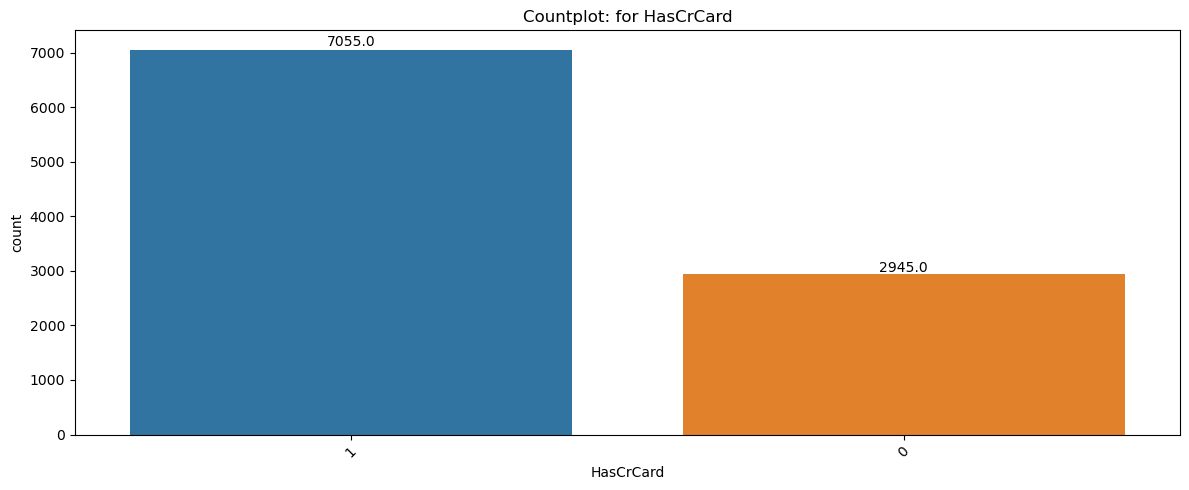

1    0.7055
0    0.2945
Name: HasCrCard, dtype: float64

In [28]:
# Countplot for HasCrCard
output_pretty_countplot(df, 'HasCrCard', \
                        order=df['HasCrCard'].value_counts().index,\
                        figsize=(12,5))
df['HasCrCard'].value_counts(normalize=True)

#### Observations
- There are 70.55% of the individuals in the dataset that have a credit card.

### 2. How many active members are there with the bank?

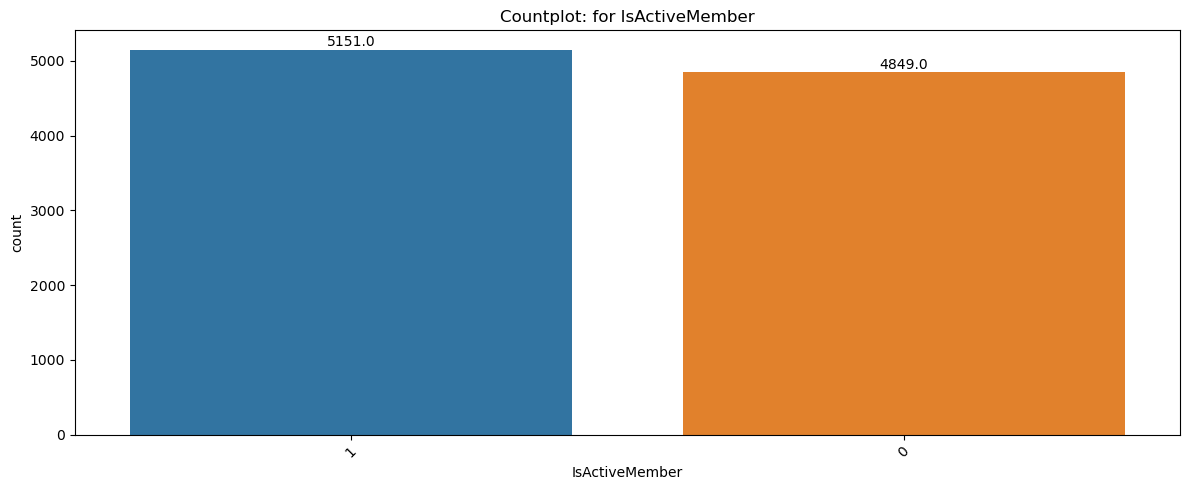

1    0.5151
0    0.4849
Name: IsActiveMember, dtype: float64

In [29]:
# Countplot for IsActiveMember
output_pretty_countplot(df, 'IsActiveMember', \
                        order=df['IsActiveMember'].value_counts().index,\
                        figsize=(12, 5))
df['IsActiveMember'].value_counts(normalize=True)

#### Observations
- There are 5151 customer that are active.
- About 51.1% of the individuals in the dataset are considering active members at the bank.

### Let's investigate EstimatedSalary

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64


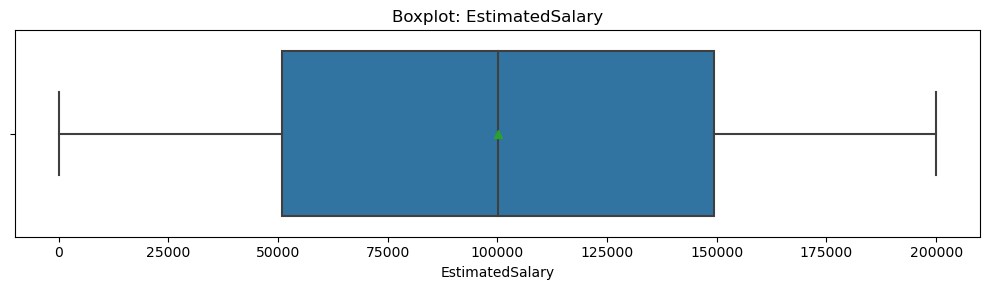

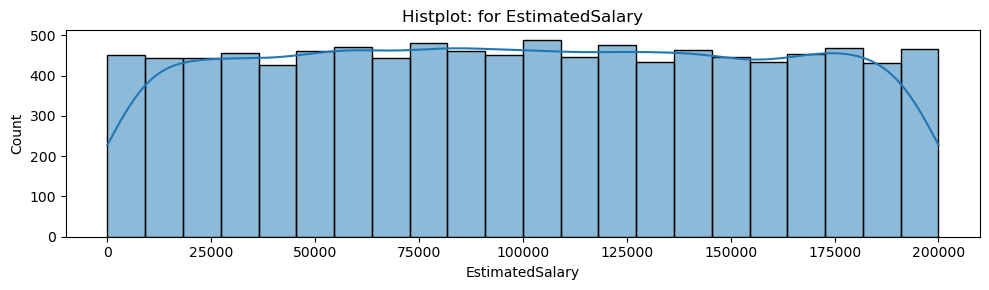

In [30]:
# Boxplot and Histplot for EstimatedSalary
output_pretty_numeric_plots(df, 'EstimatedSalary')

#### Observations
- Min for EstimatedSalary is 11.58 and max is 199992.48.
- Mean for EstimatedSalary is 100090.239881 which is less than the median indicating a left skew in the data.
- The distribution for EstimatedSalary is roughly uniform.

### Let's investigate Exited

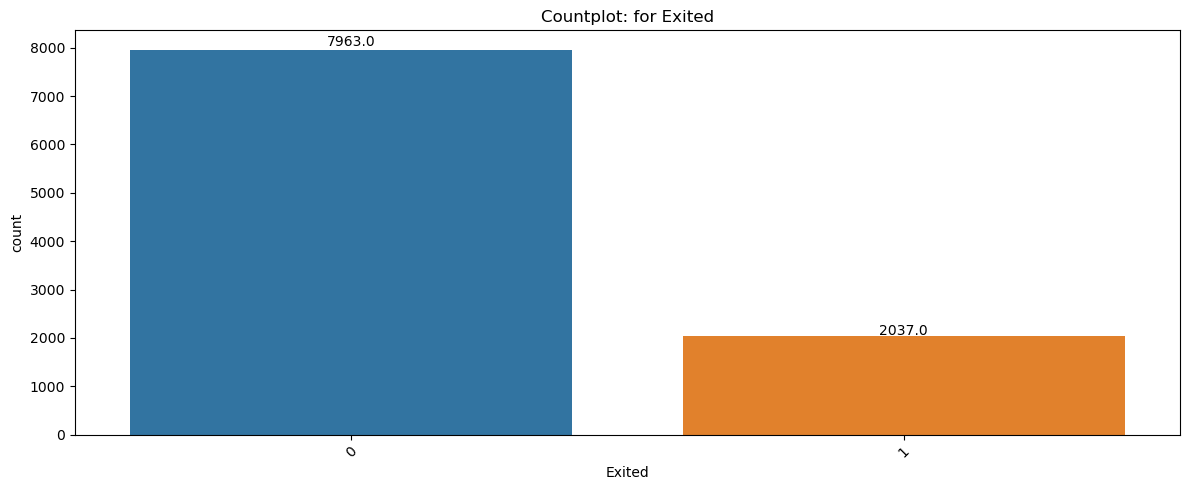

0    0.7963
1    0.2037
Name: Exited, dtype: float64

In [31]:
# Countplot for Exited
output_pretty_countplot(df, 'Exited', \
                        order=df['Exited'].value_counts().index,\
                        figsize=(12, 5))
df['Exited'].value_counts(normalize=True)

#### Observations
- Exited is the target variable in the analysis and it is imbalanced since 20.37% have exited or churned from the bank in the last six months.

## Bivariate Analysis

### 3. How are the different customer attributes correlated to each other?

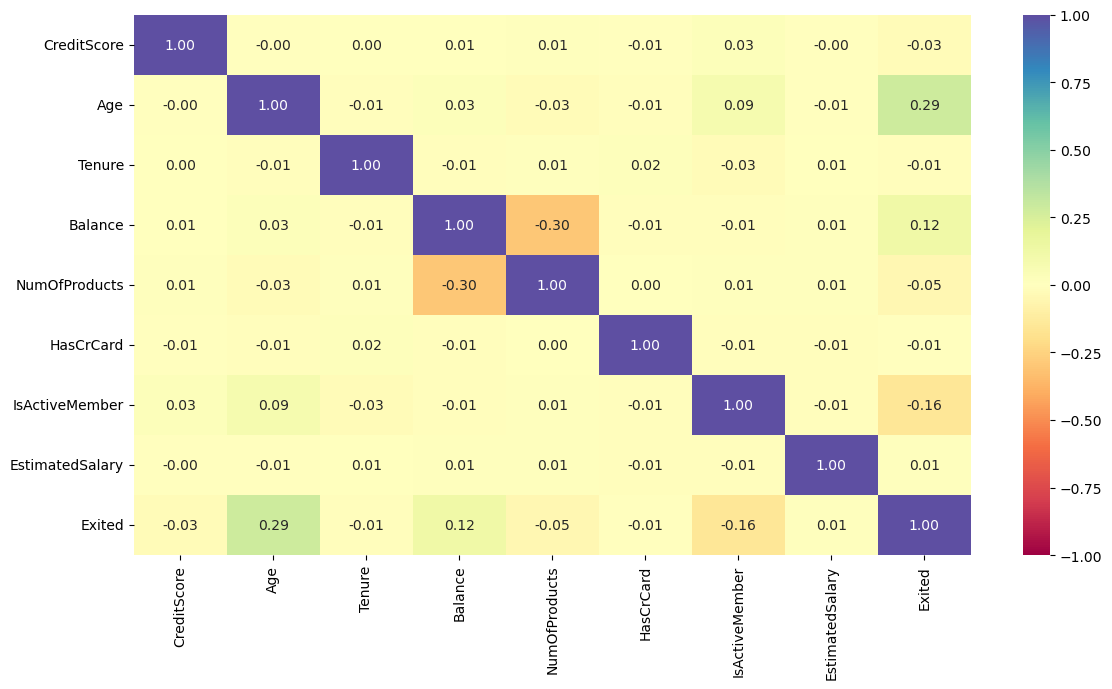

In [32]:
plt.figure(figsize=(12, 7))
sns.heatmap(
    df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

#### Observations
- Balance and NumOfProducts have a positive correlation of .3.
- Age and Exited have a positive correlation of .29.
- IsActiveMember and Exited have a negative correlation of -.16.
- Balance and Exited have a correlation of .12.

### Let's investigate Exited vs Credit Score

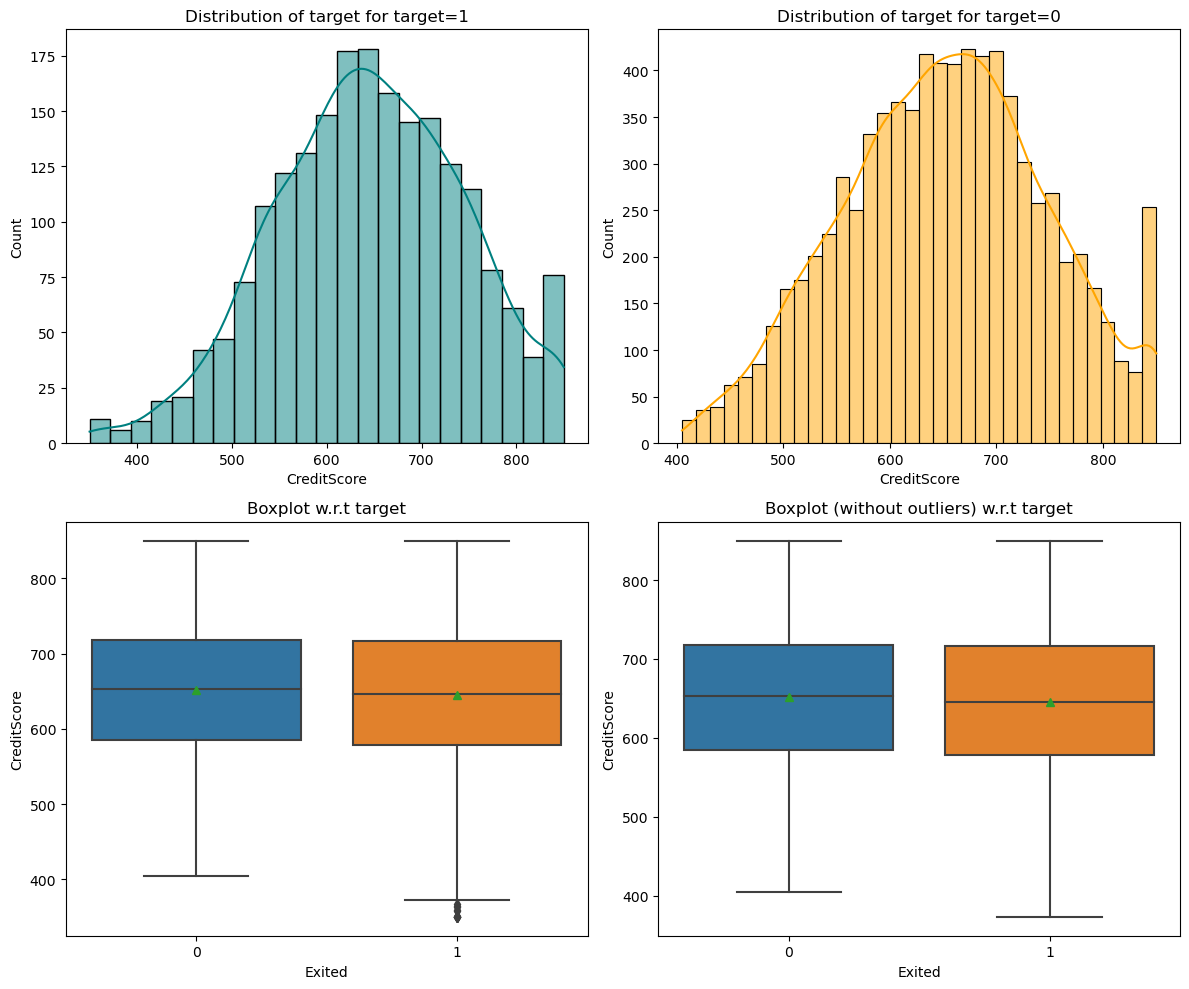

In [33]:
# Output distirbution and boxplot Exited vs Credit Score
distribution_plot_wrt_target(df, 'CreditScore', 'Exited')

#### Observations
- Both distributions for Exited = 1 and 0 are roughly normally distributed.
- The peaks in the Exited = 1 case have a more narrow band between 600-650 while Exited = 0 goes from 625 to 700.
- The is a smaller peak at 850 Exited = 1 and 0.
- Distribution has outliers.

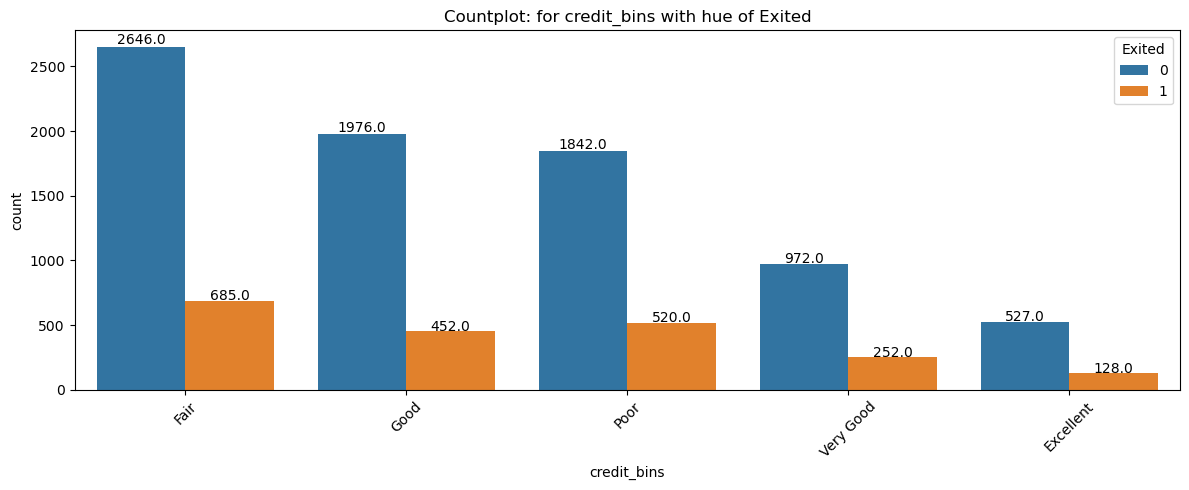

Fair         0.336279
Poor         0.255277
Good         0.221895
Very Good    0.123711
Excellent    0.062838
Name: credit_bins, dtype: float64

In [34]:
# Countplot for credit_bins
output_pretty_countplot(df, 'credit_bins', hue='Exited',\
                        order=df['credit_bins'].value_counts().index,\
                        figsize=(12,5))
df[(df['Exited'] == 1)]['credit_bins'].value_counts(normalize=True)

#### Observations
- 33.6% of the individuals with a Fair credit score churned followed by Poor with 25.5%
- Individuals with an Excellent credit rating were the least likely to churn with 6.2%.

### 4. Who is churning more when compared to males and females?

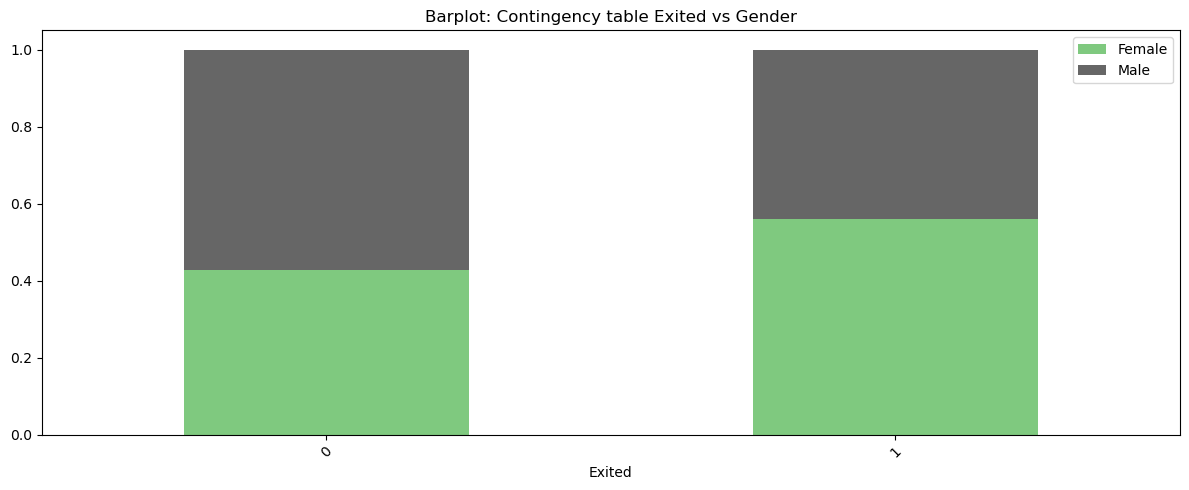

Gender,Female,Male
Exited,,
0,0.427477,0.572523
1,0.559156,0.440844


In [35]:
# crosstab plot of Exited vs Gender
output_pretty_crosstab_plot('Barplot: Contingency table Exited vs Gender', \
                            df['Exited'], df['Gender'])

#### Observations
- 55.9% of those that have exited are female while 44% are male.

### 5. Customers from which geographical part are churning more?

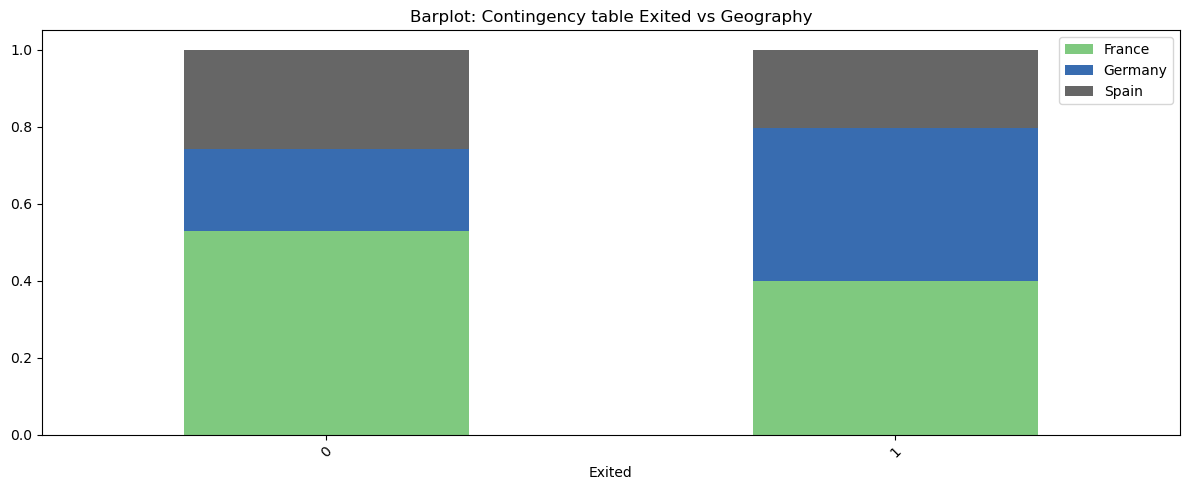

Geography,France,Germany,Spain
Exited,,,
0,0.527942,0.212859,0.259199
1,0.397644,0.399607,0.202749


In [36]:
# crosstab plot of Exited vs Geography
output_pretty_crosstab_plot('Barplot: Contingency table Exited vs Geography', \
                            df['Exited'], df['Geography'])

#### Observations
- Germany has the highest percentage of customers who churned of 39.9% while Spain has the lowest with 20.2%.

### Let's investigate Exited vs Age

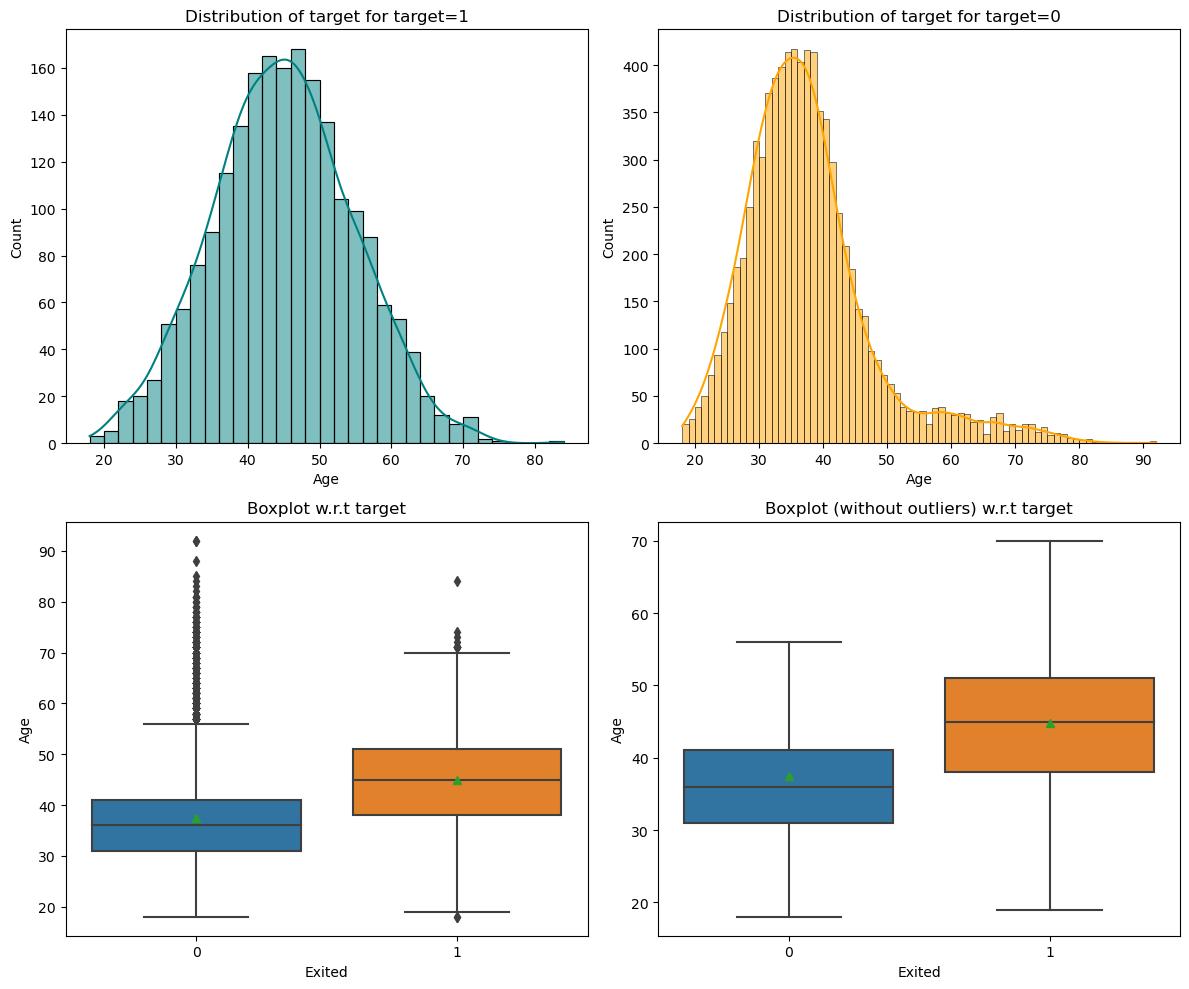

In [37]:
# Output distirbution and boxplot Exited vs Age
distribution_plot_wrt_target(df, 'Age', 'Exited')

#### Observations
- Both distributions for Exited = 1 is roughly normally distributed.
- The distribution for Exited = 0 is right skewed.
- In both cases for Age vs Exited there are outliers.
- The mean Age for Exited = 1 is about 45 and 37 for Exited = 0.
- Distribution has outliers.

### Let's investigate Exited vs Tenure

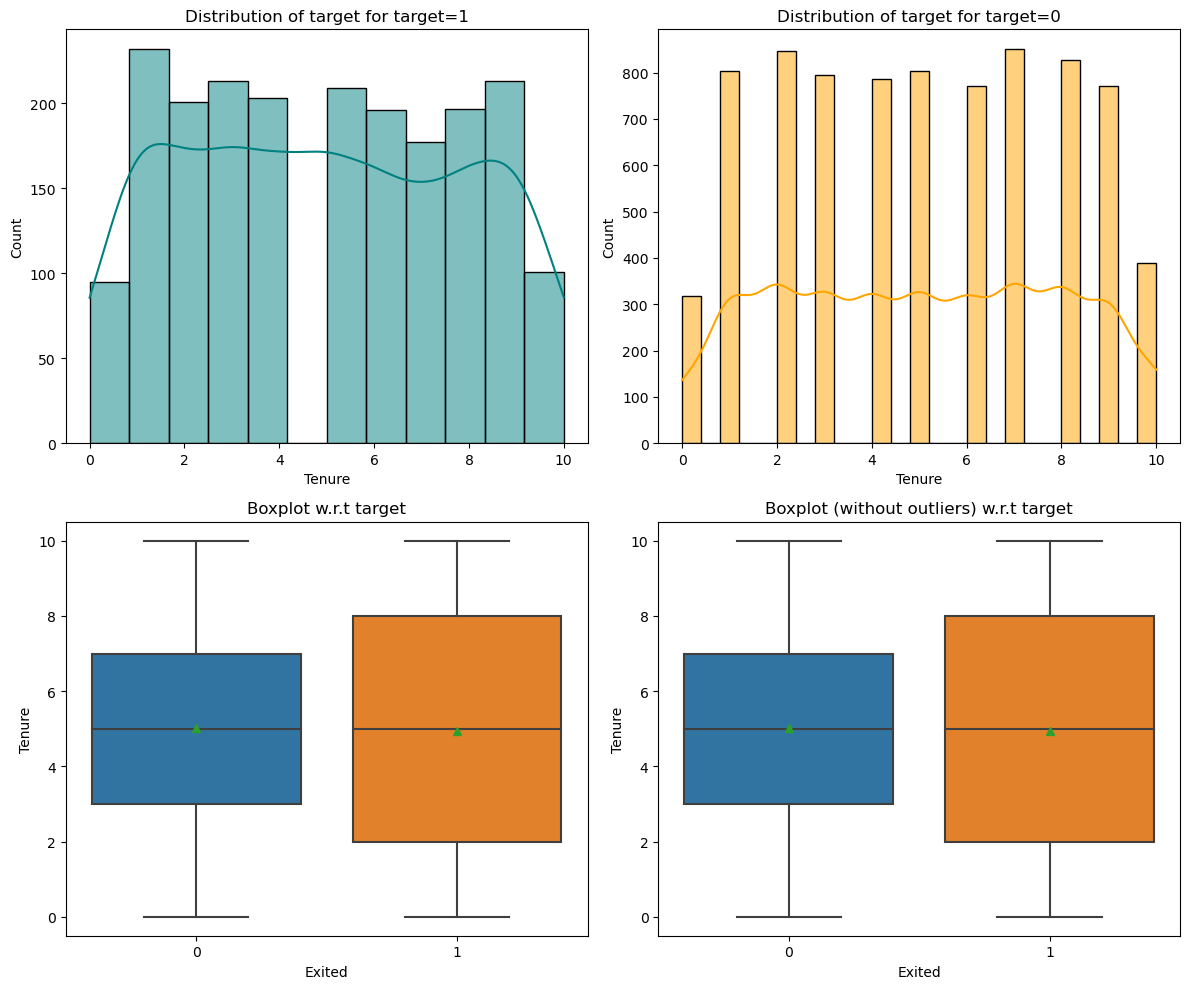

In [38]:
# Output distirbution and boxplot Exited vs Tenure
distribution_plot_wrt_target(df, 'Tenure', 'Exited')

#### Observations
- For case of Exited = 1 Tenure has a peak at about a count of 230 for Tenure of 1.
- For case of Exited = 1 Tenure has a peak at about a count of 850 for Tenure of 7.
- The mean for Exited == 1, 0 is around 5 for Tenure.

### Let's investigate Exited vs Balance

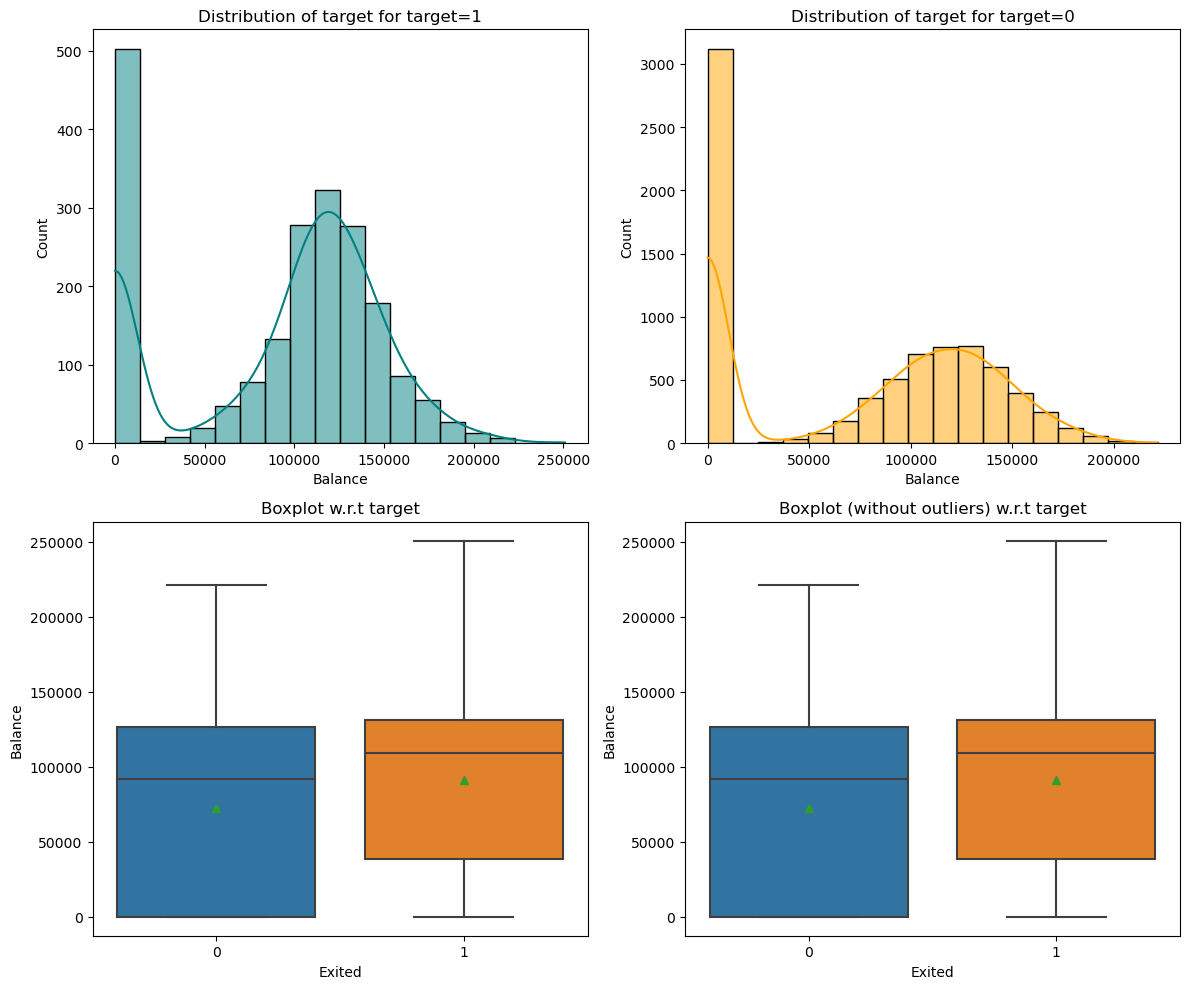

In [39]:
# Output distirbution and boxplot Exited vs Balance
distribution_plot_wrt_target(df, 'Balance', 'Exited')

#### Observations
- For case of Exited = 1 Balance has a peak at about a count of 500 for Balance of 0.
- For case of Existed = 1 there are three smaller peaks in the Balance band of 100-150k.
- For case of Exited = 0 Balance has a peak at about a count of 3115 for Balance of 0.
- It seems unusual that such a higher number of customer have a 0 balance.
- The mean for Exited == 1 for Balance is about 91100.
- The mean for Exited == 0 for Balance is about 72500.

### Let's investigate Exited vs NumOfProducts

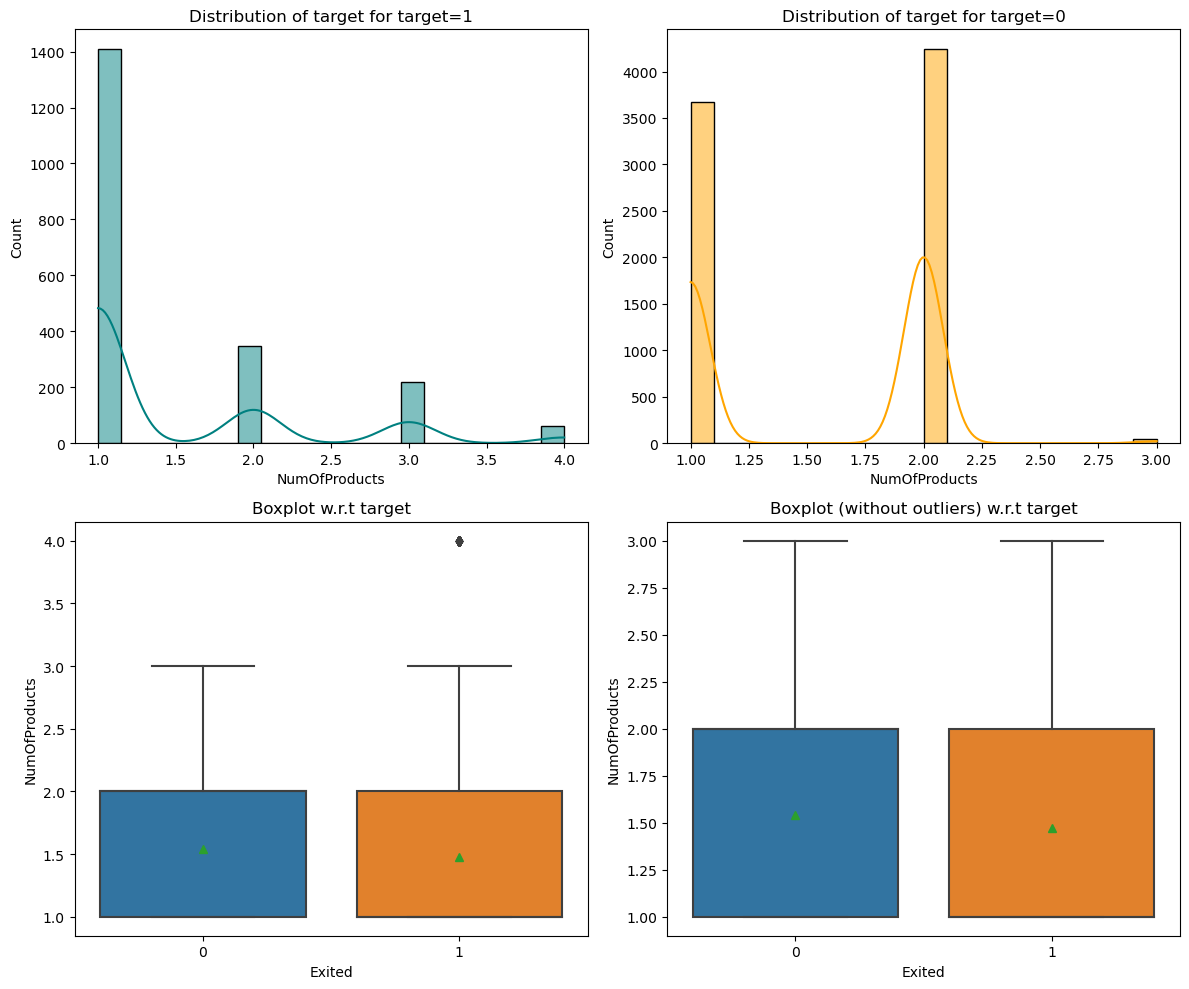

In [40]:
# Output distirbution and boxplot Exited vs NumOfProducts
distribution_plot_wrt_target(df, 'NumOfProducts', 'Exited')

#### Observations
- There is an evident right skew to the distribution where Exited = 1 with respect to NumOfProducts.
- For case of Exited = 1 NumOfProducts has a peak at about a count of 1400 for NumOfproducts of 1.
- For case of Exited = 0 NumOfProducts has a peak at about a count of 4242 for NumOfProducts of 2.
- The mean for Exited == 1, 0 for NumOfProducts is about 1.5 and look very similar.
- All of the customers with NumOfProducts of 4 churned along with a large portion of customers with NumOfProducts of 3.
- Distribution has outliers.

### Let's investigate Exited vs HasCrCard

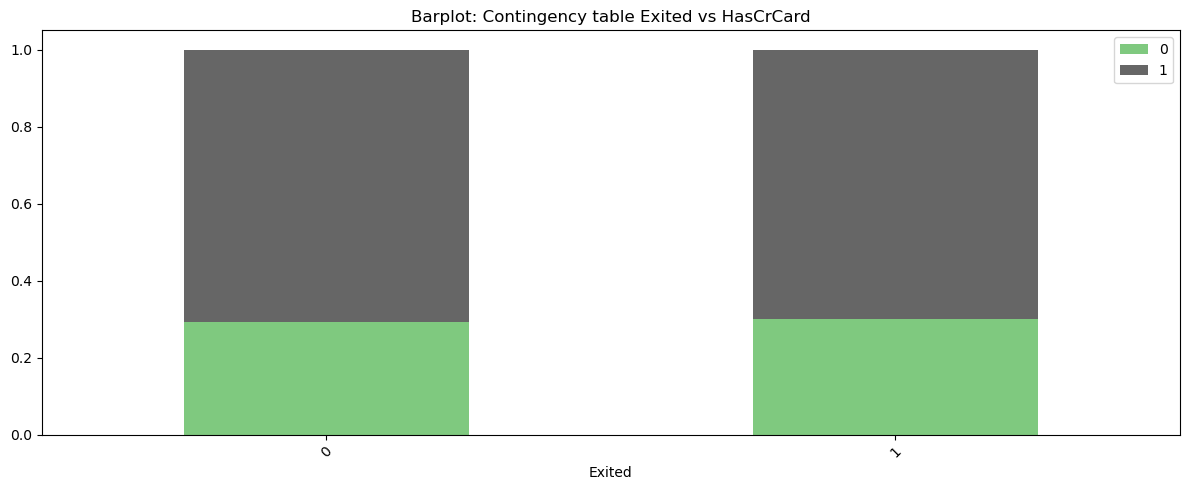

HasCrCard,0,1
Exited,,
0,0.292854,0.707146
1,0.300933,0.699067


In [41]:
# crosstab plot of Exited vs HasCrCard
output_pretty_crosstab_plot('Barplot: Contingency table Exited vs HasCrCard', \
                            df['Exited'], df['HasCrCard'], )

#### Observations
- 69.9% of those that have churned have a credit card while 30% did not.

### Let's investigate Exited vs IsActiveMember

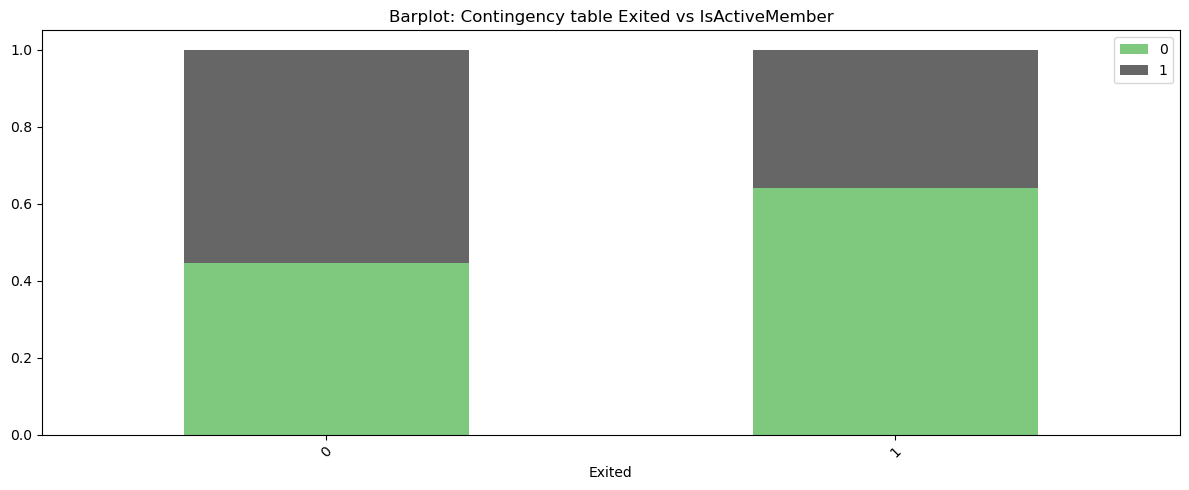

IsActiveMember,0,1
Exited,,
0,0.445435,0.554565
1,0.639175,0.360825


In [42]:
# crosstab plot of Exited vs IsActiveMember
output_pretty_crosstab_plot('Barplot: Contingency table Exited vs IsActiveMember', \
                            df['Exited'], df['IsActiveMember'], )

#### Observations
*- 36% of those who churned were active customers.

### Let's investigate Exited vs EstimatedSalary

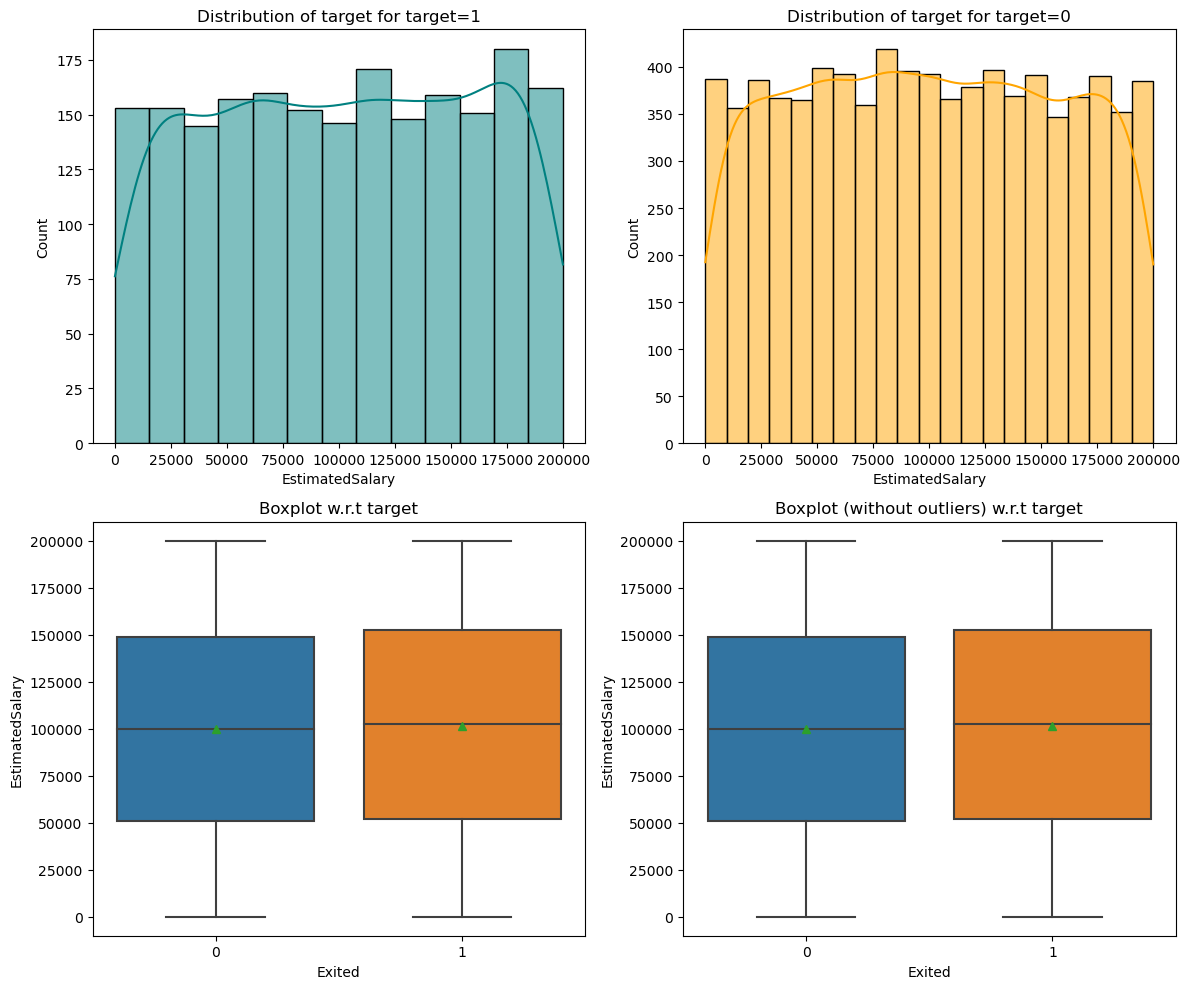

In [43]:
# Output distirbution and boxplot Exited vs EstimatedSalary
distribution_plot_wrt_target(df, 'EstimatedSalary', 'Exited')

#### Observations
- The distributions for Exited of 0, 1 is a roughly uniform distribution.
- The mean EstimatedSalary for Exited of 1, 0 is about 100000.

### Let's investigate Geography vs Gender

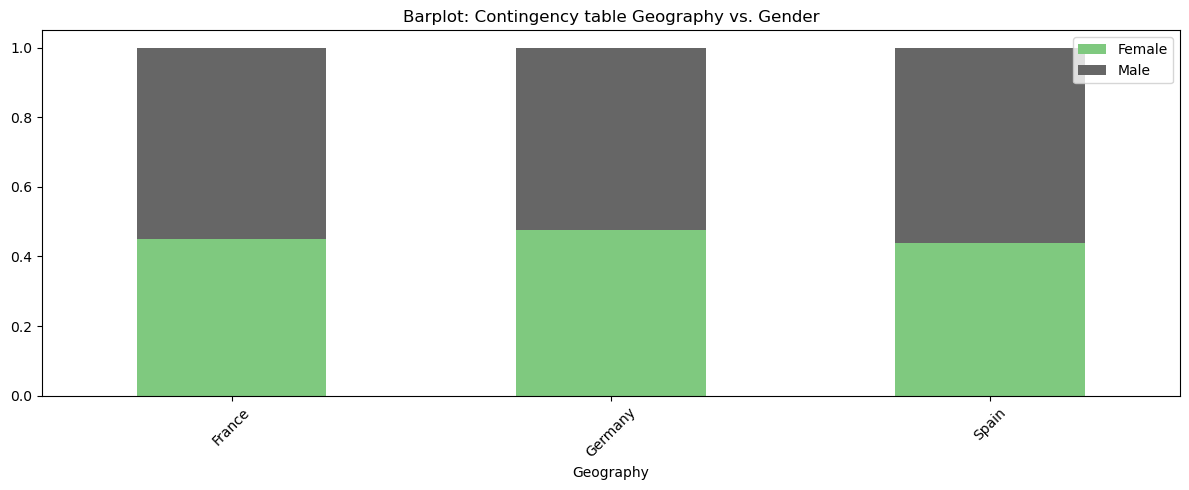

Gender,Female,Male
Geography,,
France,0.450937,0.549063
Germany,0.475488,0.524512
Spain,0.439645,0.560355


In [44]:
# crosstab plot of Geography vs. Gender
output_pretty_crosstab_plot('Barplot: Contingency table Geography vs. Gender', \
                            df['Geography'], df['Gender'], )

#### Observations
- 54.9% of the customers from France are male.
- 52.4% of the customers from Germany are male.
- 56% of the customers from Spain are male.

### Let's investigate Geography vs Age

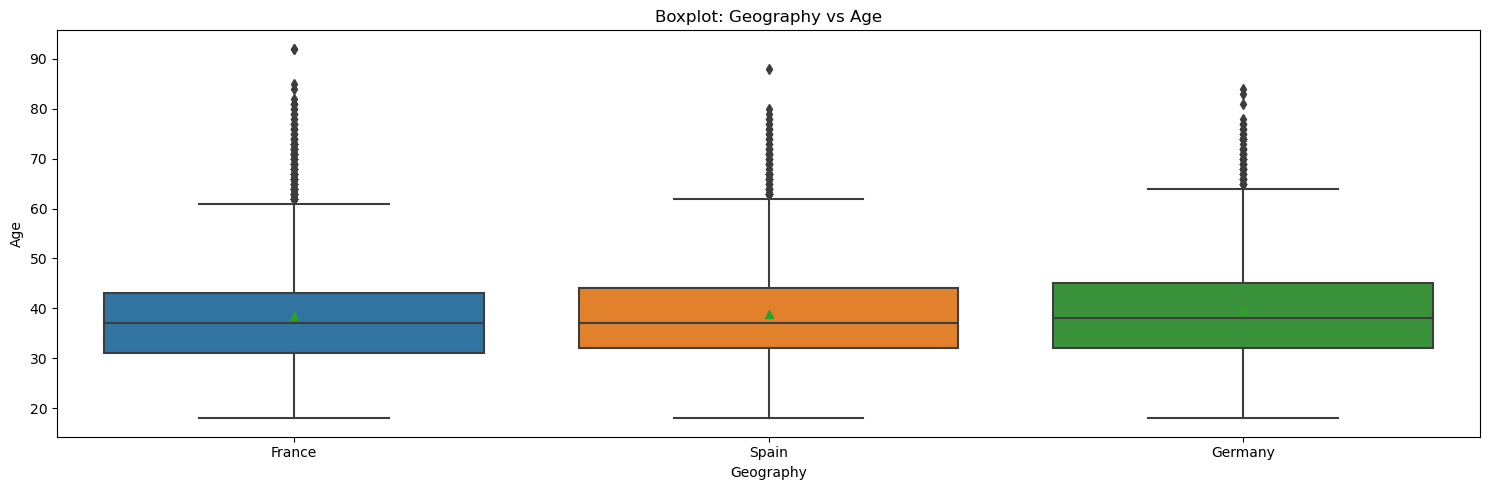

Age                                                    
            count       mean        std   min   25%   50%   75%   max
Geography                                                            
France     5014.0  38.511767  10.469459  18.0  31.0  37.0  43.0  92.0
Germany    2509.0  39.771622  10.519143  18.0  32.0  38.0  45.0  84.0
Spain      2477.0  38.890997  10.446119  18.0  32.0  37.0  44.0  88.0

In [45]:
# Boxplot Geography vs Age
output_pretty_boxplot(df, x='Geography', y='Age',\
                     figsize=(15,5));
describe_df = df.groupby(['Geography'])[['Age']].describe()
describe_df

#### Observations
- Min Age value for France Geography is 18.000 and max is 92.000
- Mean Age for France Geography is 38.512 which is greater than the median indicating the data is right skewed.


- Min Age value for Germany Geography is 18.000 and max is 84.000
- Mean Age for Germany Geography is 39.772 which is greater than the median indicating the data is right skewed.


- Min Age value for Spain Geography is 18.000 and max is 88.000
- Mean Age for Spain Geography is 38.891 which is greater than the median indicating the data is right skewed.
- Distribution has outliers.

### Let's investigate Geography vs Balance

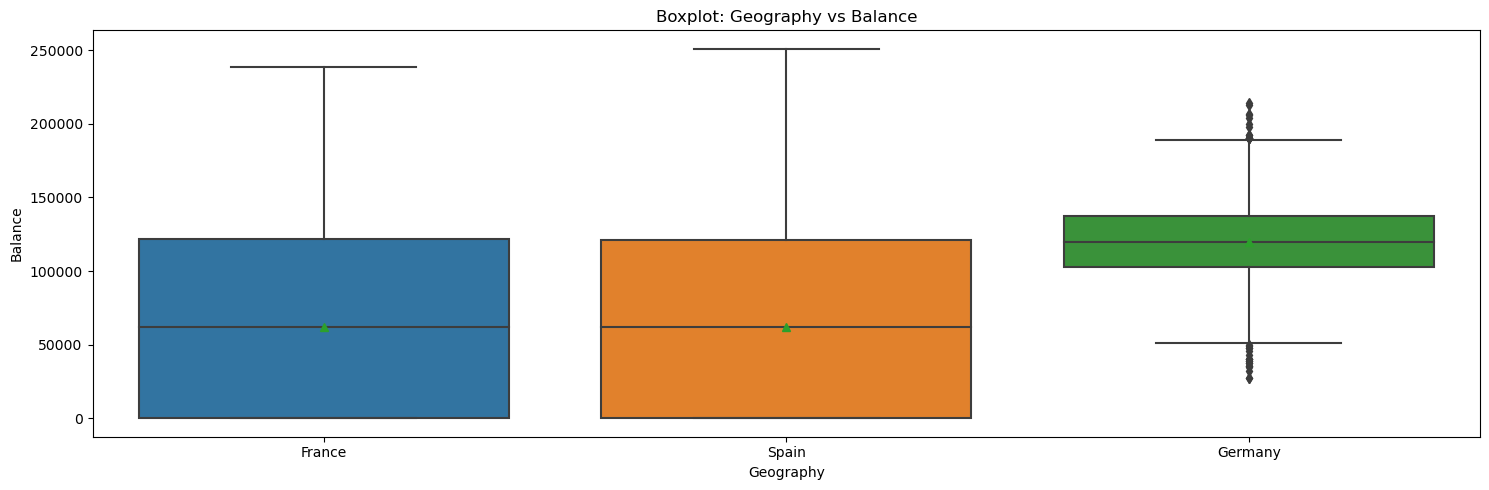

Balance                                                    \
            count           mean           std       min        25%   
Geography                                                             
France     5014.0   62092.636516  64133.565524      0.00       0.00   
Germany    2509.0  119730.116134  27022.006157  27288.43  102800.72   
Spain      2477.0   61818.147763  64235.555208      0.00       0.00   

                                              
                 50%          75%        max  
Geography                                     
France      62153.50  121444.8775  238387.56  
Germany    119703.10  137560.3800  214346.96  
Spain       61710.44  121056.6300  250898.09

In [46]:
# Boxplot Geography vs Balance
output_pretty_boxplot(df, x='Geography', y='Balance',\
                     figsize=(15,5));
describe_df = df.groupby(['Geography'])[['Balance']].describe()
describe_df

#### Observations
- Min Balance value for France Geography is 0.000 and max is 238387.560
- Mean Balance for France Geography is 62092.637 which is less than the median indicating the data is left skewed.


- Min Balance value for Germany Geography is 27288.430 and max is 214346.960
- Mean Balance for Germany Geography is 119730.116 which is greater than the median indicating the data is right skewed.


- Min Balance value for Spain Geography is 0.000 and max is 250898.090
- Mean Balance for Spain Geography is 61818.148 which is greater than the median indicating the data is right skewed.
- Distribution has outliers.

### Let's investigate NumOfProducts vs Balance with a hue of Exited

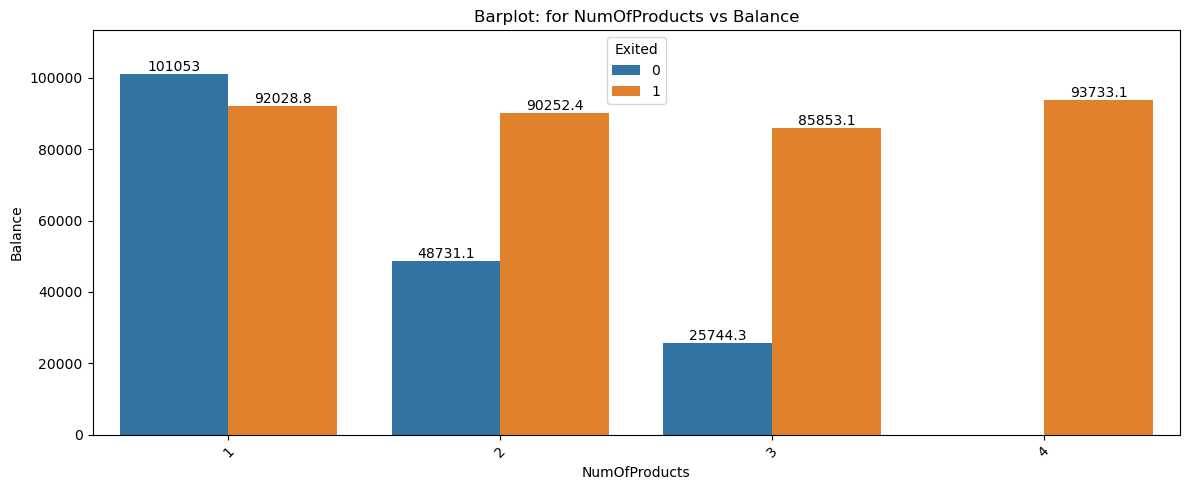

In [47]:
output_pretty_barplot(df, 'NumOfProducts', 'Balance', hue='Exited')

#### Observations
- The average balance for customers with NumOfProduct of 2 is 85.2% higher than those who did not exit.  
- The average balance for customers with NumOfProduct of 3 is 233.48% higher than those who did not exit.
- All customer with NumOfProducts of 4 exited and had an average balance of 93733.1.

### Let's investigate Age vs Balance with a hue of Exited

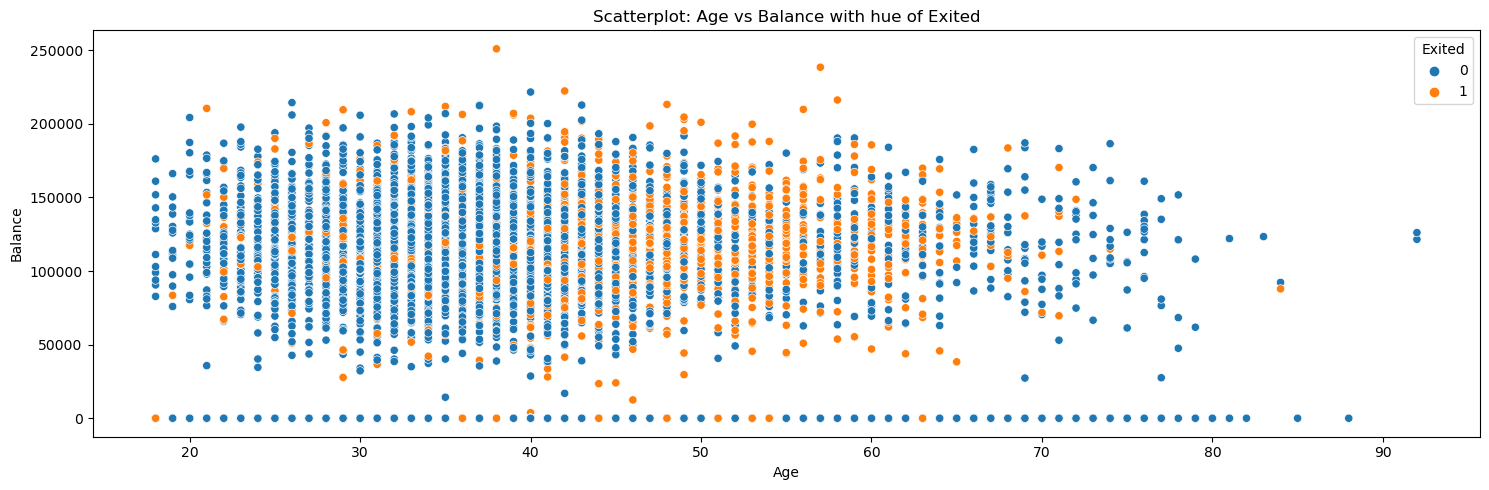

In [48]:
output_pretty_scatterplot(df, 'Age', 'Balance', hue='Exited')

#### Observations
- There seems to be a large cluster of customers that exited the bank in the age band of 40-60.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

### Data Preparation for Modeling

In [49]:
# Drop credit_bins only needed for visualization
df.drop('credit_bins',axis=1,inplace=True)

In [50]:
# Prepare the dependent and independent variables
X = df.drop(['Exited'],axis=1)    
y = df[['Exited']]               

In [51]:
# Splitting the dataset into the Training and Testing set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y, 
                                                    shuffle=True)

In [52]:
# Splitting the dataset into the Training and Validation set.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed, stratify=y_train, 
                                                  shuffle=True)

In [53]:
### Create dummy variables
cat_columns = ["Geography", "Gender"]
X_train = pd.get_dummies(X_train, columns=cat_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=cat_columns, drop_first=True)
X_val = pd.get_dummies(X_val, columns=cat_columns, drop_first=True)    

In [54]:
print('X_train shape {}'.format(X_train.shape))
print('X_test shape {}'.format(X_test.shape))
print('X_val shape {}'.format(X_val.shape))

X_train shape (6400, 11)
X_test shape (2000, 11)
X_val shape (1600, 11)


In [55]:
# Scale the data for modelling
columns_that_need_scaling = ["CreditScore","Age","Tenure","Balance","EstimatedSalary"]

scaler = StandardScaler()
fit_scaler = scaler.fit(X_train[columns_that_need_scaling])
X_train[columns_that_need_scaling] = fit_scaler.transform(X_train[columns_that_need_scaling])
X_test[columns_that_need_scaling] = fit_scaler.transform(X_test[columns_that_need_scaling])
X_val[columns_that_need_scaling] = fit_scaler.transform(X_val[columns_that_need_scaling])

## Model Building

### Model Evaluation Criterion

**Model can make wrong predictions as:**
* Predicting a customer is churning and they are not. (False Positive)
* Predicting a customer is not churning and they churn. (False Negative )

**Which case is more important?**
* Predicting a customer is not churning and they do could be a higher cost to the bank in terms of lost revenue however the opposite case will also have a cost to the bank in terms of remediation efforts that may not be necessary. In this situation losing a customer is deemed to be more important which is the False Negative case.

**How to minimize False Negatives?**
* Banks will want to use Recall since it minimizes false negatives (predict customer is not going to churn but they do).

In [56]:
# Stash the model test performance
training_results = {}

# Stash the model validation performance
validation_results = {}

# Optimal ROC results
roc_results = {}

### Model Building: Basic Neural Network

In [57]:
model_1 = build_basic_model()

In [58]:
learning_rate = 1e-3
model_1.compile(optimizer=SGD(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [59]:
# Output summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Train the model
epochs = 100
batch_size = 32
history= model_1.fit(X_train, y_train, verbose = verbose, validation_data=(X_val,y_val), epochs= epochs,
          batch_size=batch_size)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5986 - accuracy: 0.7439 - val_loss: 0.5732 - val_accuracy: 0.7794
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5605 - accuracy: 0.7837 - val_loss: 0.5439 - val_accuracy: 0.7931
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5375 - accuracy: 0.7931 - val_loss: 0.5258 - val_accuracy: 0.7969
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5229 - accuracy: 0.7958 - val_loss: 0.5139 - val_accuracy: 0.7962
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5130 - accuracy: 0.7961 - val_loss: 0.5055 - val_accuracy: 0.7962
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5059 - accuracy: 0.7962 - val_loss: 0.4993 - val_accuracy: 0.7962
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.5003 - accuracy: 0.7962 - val_loss: 0.4942 - val_accuracy: 0.7962

Epoch 58/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4277 - accuracy: 0.8092 - val_loss: 0.4280 - val_accuracy: 0.8144
Epoch 59/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4273 - accuracy: 0.8102 - val_loss: 0.4277 - val_accuracy: 0.8150
Epoch 60/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4269 - accuracy: 0.8112 - val_loss: 0.4274 - val_accuracy: 0.8163
Epoch 61/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4265 - accuracy: 0.8112 - val_loss: 0.4272 - val_accuracy: 0.8169
Epoch 62/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4261 - accuracy: 0.8116 - val_loss: 0.4269 - val_accuracy: 0.8175
Epoch 63/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4258 - accuracy: 0.8111 - val_loss: 0.4267 - val_accuracy: 0.8175
Epoch 64/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4254 - accuracy: 0.8114 - val_loss: 0.4264 - val_accuracy:

In [61]:
# Evaluate model performance with for train
model_1_train = model_performance_classification(model_1, X_train, y_train)

200/200 [==============================] - 0s 572us/step


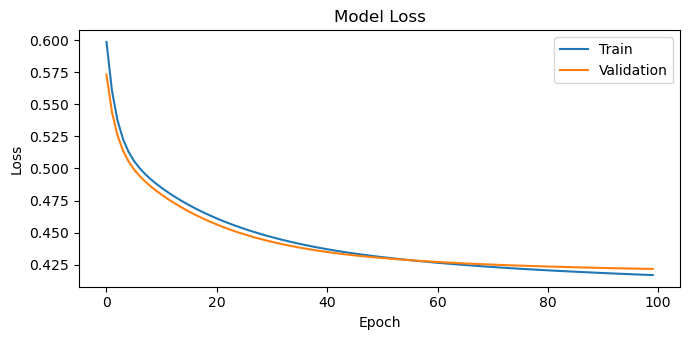

200/200 [==============================] - 0s 607us/step


,precision,recall,f1-score,support
0,0.828276,0.974882,0.895619,5096.000000
1,0.681592,0.210123,0.321219,1304.000000
accuracy,0.819063,0.819063,0.819063,0.819063
macro avg,0.754934,0.592502,0.608419,6400.000000
weighted avg,0.798389,0.819063,0.778585,6400.000000


50/50 [==============================] - 0s 722us/step


,precision,recall,f1-score,support
0,0.826897,0.974882,0.894813,1274.000000
1,0.673469,0.202454,0.311321,326.000000
accuracy,0.817500,0.817500,0.817500,0.817500
macro avg,0.750183,0.588668,0.603067,1600.000000
weighted avg,0.795636,0.817500,0.775926,1600.000000


In [62]:
# Output loss curve
output_loss(history)

# Output classification reports for train and validation
make_classification_report(model_1, X_train, y_train, title_suffix='Train')
make_classification_report(model_1, X_val, y_val, title_suffix='Validation')

#### Observations
- The loss curve shows the loss declining nicely over time for both the train and validation datasets indicating no over or underfitting.
- Model 1 recall score .202 pre ROC is very low.

200/200 [==============================] - 0s 599us/step


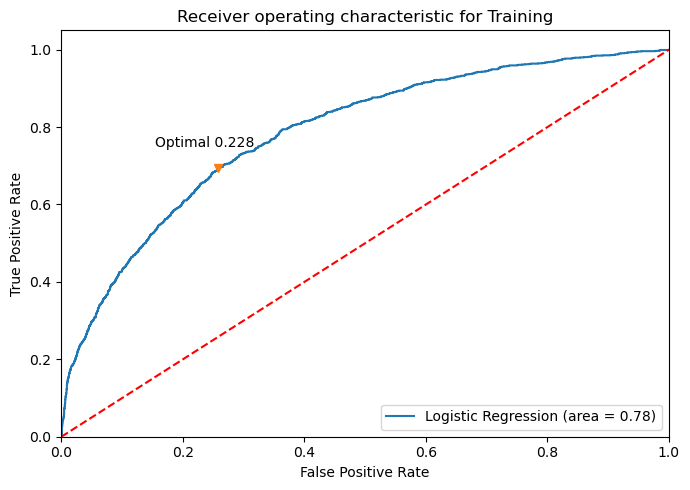

50/50 [==============================] - 0s 707us/step


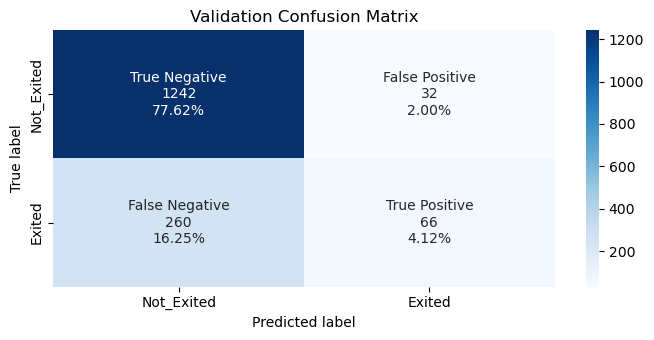

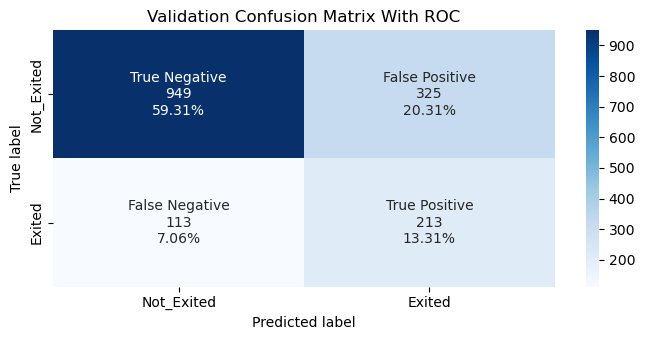

In [63]:
# Output confusion matrix for validation with and without ROC threshold
roc_results["Mod 1"] = make_roc_curve(model_1, X_train, y_train)
make_confusion_matrix_with_roc(model_1, X_val, y_val, roc_results["Mod 1"])

# Evaluate model performance for test and test with ROC threshold
model_1_val = model_performance_classification(model_1, X_val, y_val)
model_1_val_optimal_roc = model_performance_classification(model_1, X_val, y_val, roc_results["Mod 1"])

In [64]:
# Output classification reports for test with ROC threshold
make_classification_report(model_1, X_val, y_val, title_suffix='Validation with ROC Threshold', \
                           threshold=roc_results["Mod 1"])

50/50 [==============================] - 0s 621us/step


,precision,recall,f1-score,support
0,0.893597,0.744898,0.812500,1274.000000
1,0.395911,0.653374,0.493056,326.000000
accuracy,0.726250,0.726250,0.726250,0.726250
macro avg,0.644754,0.699136,0.652778,1600.000000
weighted avg,0.792193,0.726250,0.747413,1600.000000


#### Observations
- The Model 1 Recall score post ROC threshold improved to .653.
- The ROC threshold came back at .228 for the optimal value
- The False Negative rate dropped to 7.06% from 16.25% for Model 1. 
- In addition False Positives did jump to 20.31% from 2% a 10x increase while Precision declined from .673 to .395.

In [65]:
# add training results 
training_results["Mod 1"] = model_1_train.T

# add validation results
validation_results["Mod 1"] = model_1_val.T
validation_results["Mod 1 ROC"] = model_1_val_optimal_roc.T

### Model Building: Neural Network model with Adam Optimizer

In [66]:
model_2 = build_basic_model()

In [67]:
learning_rate = 1e-3
model_2.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [68]:
# Output summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [69]:
# Train the model
epochs = 100
batch_size = 32
history= model_2.fit(X_train, y_train, verbose = verbose, validation_data=(X_val,y_val), epochs= epochs,
          batch_size=batch_size)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4583 - accuracy: 0.7894 - val_loss: 0.4269 - val_accuracy: 0.8156
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4146 - accuracy: 0.8198 - val_loss: 0.4134 - val_accuracy: 0.8256
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4006 - accuracy: 0.8314 - val_loss: 0.4042 - val_accuracy: 0.8381
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3854 - accuracy: 0.8383 - val_loss: 0.3874 - val_accuracy: 0.8400
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3729 - accuracy: 0.8444 - val_loss: 0.3775 - val_accuracy: 0.8381
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3621 - accuracy: 0.8494 - val_loss: 0.3708 - val_accuracy: 0.8413
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3541 - accuracy: 0.8536 - val_loss: 0.3653 - val_accuracy: 0.8450

Epoch 58/100
200/200 [==============================] - 0s 1ms/step - loss: 0.2741 - accuracy: 0.8864 - val_loss: 0.3673 - val_accuracy: 0.8544
Epoch 59/100
200/200 [==============================] - 0s 1ms/step - loss: 0.2715 - accuracy: 0.8894 - val_loss: 0.3728 - val_accuracy: 0.8494
Epoch 60/100
200/200 [==============================] - 0s 1ms/step - loss: 0.2709 - accuracy: 0.8838 - val_loss: 0.3785 - val_accuracy: 0.8569
Epoch 61/100
200/200 [==============================] - 0s 1ms/step - loss: 0.2707 - accuracy: 0.8884 - val_loss: 0.3743 - val_accuracy: 0.8575
Epoch 62/100
200/200 [==============================] - 0s 1ms/step - loss: 0.2726 - accuracy: 0.8875 - val_loss: 0.3689 - val_accuracy: 0.8506
Epoch 63/100
200/200 [==============================] - 0s 1ms/step - loss: 0.2685 - accuracy: 0.8902 - val_loss: 0.3761 - val_accuracy: 0.8537
Epoch 64/100
200/200 [==============================] - 0s 1ms/step - loss: 0.2686 - accuracy: 0.8897 - val_loss: 0.3780 - val_accuracy:

In [70]:
# Evaluate model performance with for train
model_2_train = model_performance_classification(model_2, X_train, y_train)

200/200 [==============================] - 0s 575us/step


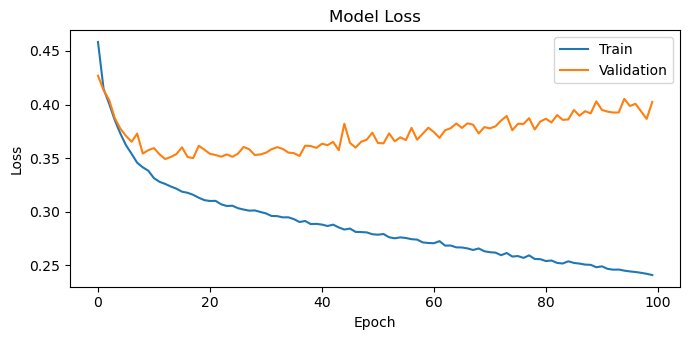

200/200 [==============================] - 0s 582us/step


,precision,recall,f1-score,support
0,0.901497,0.980573,0.939374,5096.000000
1,0.884481,0.581288,0.701527,1304.000000
accuracy,0.899219,0.899219,0.899219,0.899219
macro avg,0.892989,0.780931,0.820451,6400.000000
weighted avg,0.898030,0.899219,0.890913,6400.000000


50/50 [==============================] - 0s 778us/step


,precision,recall,f1-score,support
0,0.862482,0.959969,0.908618,1274.000000
1,0.719780,0.401840,0.515748,326.000000
accuracy,0.846250,0.846250,0.846250,0.846250
macro avg,0.791131,0.680905,0.712183,1600.000000
weighted avg,0.833407,0.846250,0.828571,1600.000000


In [71]:
# Output loss curve
output_loss(history)

# Output classification reports for train and validation
make_classification_report(model_2, X_train, y_train, title_suffix='Train')
make_classification_report(model_2, X_val, y_val, title_suffix='Validation')

#### Observations
- The loss curve is clearly showing that Model 2 is overfit (.581 Recall for training and .40 for Validation)
- The Recall for Validation .40 has improved from Model 1 pre ROC.

200/200 [==============================] - 0s 658us/step


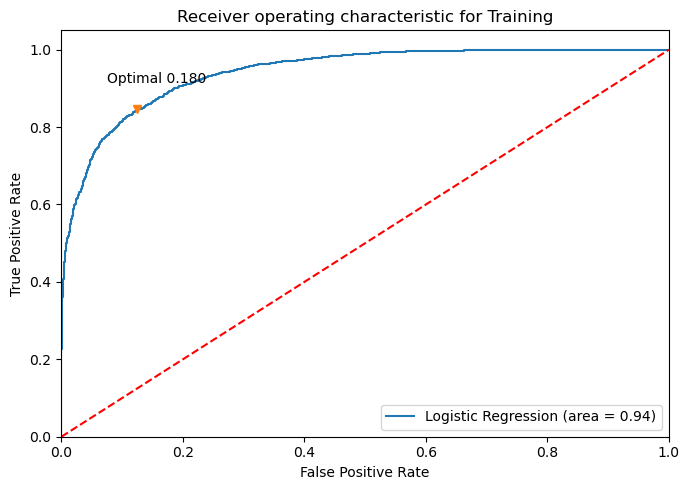

50/50 [==============================] - 0s 910us/step


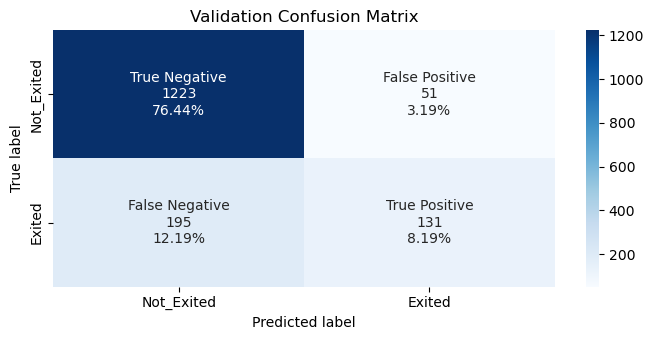

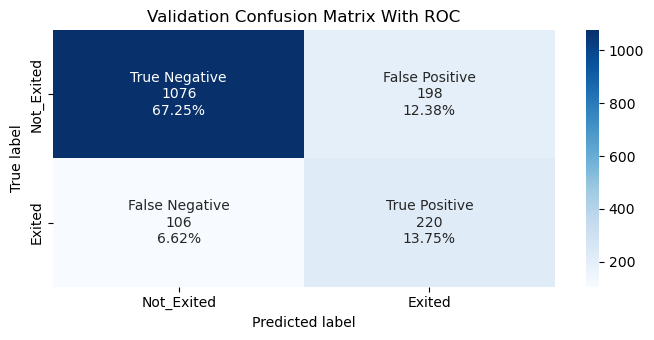

In [72]:
# Output confusion matrix for validation with and without ROC threshold
roc_results["Mod 2"] = make_roc_curve(model_2, X_train, y_train)
make_confusion_matrix_with_roc(model_2, X_val, y_val, roc_results["Mod 2"])

# Evaluate model performance for test and test with ROC threshold
model_2_val = model_performance_classification(model_2, X_val, y_val)
model_2_val_optimal_roc = model_performance_classification(model_2, X_val, y_val, roc_results["Mod 2"])

In [73]:
# Output classification reports for test with ROC threshold
make_classification_report(model_2, X_val, y_val, title_suffix='Validation with ROC Threshold', \
                           threshold=roc_results["Mod 2"])

50/50 [==============================] - 0s 804us/step


,precision,recall,f1-score,support
0,0.910321,0.844584,0.876221,1274.000000
1,0.526316,0.674847,0.591398,326.000000
accuracy,0.810000,0.810000,0.810000,0.810000
macro avg,0.718319,0.759715,0.733810,1600.000000
weighted avg,0.832080,0.810000,0.818189,1600.000000


#### Observations
- The Model 2 Recall score post ROC threshold improved to .674.
- The ROC threshold came back at .180 for the optimal value
- Tthe False Negative rate dropped from 12.19% to to 6.62% for Model 2. 
- In addition False Positives did jump to 12.38% from 3.19% a ~4x increase while Precision declined from .719 to .526.

In [74]:
# add training results 
training_results["Mod 2"] = model_2_train.T

# add validation results 
validation_results["Mod 2"] = model_2_val.T
validation_results["Mod 2 ROC"] = model_2_val_optimal_roc.T

### Model Building: Neural Network model with Adam Optimizer and early stopping

### Callback EarlyStopping

- EarlyStopping halts training when the model's performance on a validation set plateaus or starts to worsen. This helps you avoid overfitting and saves time by not continuing training that won't lead to better results.
- EarlyStopping prevents overfitting which can occur when a model trains too long and loses generalization.
- EarlyStopping saves resources and trains efficiently.

In [75]:
model_2e = build_basic_model()

In [76]:
learning_rate = 1e-3
model_2e.compile(optimizer=Adam(learning_rate=learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

In [77]:
# Output summary of the model
model_2e.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [78]:
# Train the model
epochs = 100
batch_size = 32
history= model_2e.fit(X_train, y_train, verbose = verbose, validation_data=(X_val,y_val), epochs= epochs,
          batch_size=batch_size,callbacks=EarlyStopping(monitor='val_loss', patience=5, mode='min', min_delta=0.001,
                                                        verbose=1))

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4643 - accuracy: 0.7991 - val_loss: 0.4299 - val_accuracy: 0.8156
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4137 - accuracy: 0.8230 - val_loss: 0.4135 - val_accuracy: 0.8306
Epoch 3/100
200/200 [==============================] - 0s 1000us/step - loss: 0.3990 - accuracy: 0.8320 - val_loss: 0.4045 - val_accuracy: 0.8375
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.8358 - val_loss: 0.3949 - val_accuracy: 0.8363
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8386 - val_loss: 0.3880 - val_accuracy: 0.8381
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3664 - accuracy: 0.8444 - val_loss: 0.3810 - val_accuracy: 0.8413
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3593 - accuracy: 0.8486 - val_loss: 0.3776 - val_accuracy: 0.8

In [79]:
# Evaluate model performance with for train
model_2e_train = model_performance_classification(model_2e, X_train, y_train)

200/200 [==============================] - 0s 586us/step


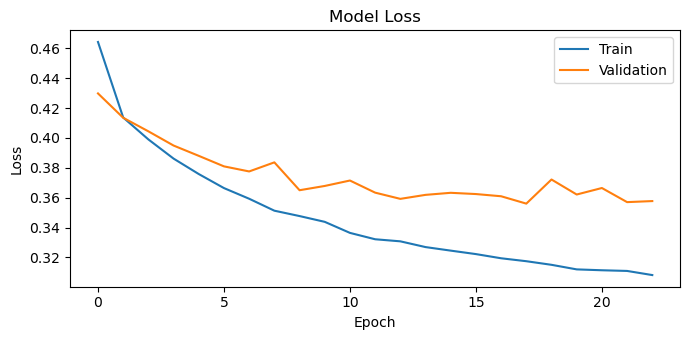

200/200 [==============================] - 0s 561us/step


,precision,recall,f1-score,support
0,0.890500,0.963893,0.925744,5096.000000
1,0.791855,0.536810,0.639854,1304.000000
accuracy,0.876875,0.876875,0.876875,0.876875
macro avg,0.841178,0.750352,0.782799,6400.000000
weighted avg,0.870401,0.876875,0.867494,6400.000000


50/50 [==============================] - 0s 752us/step


,precision,recall,f1-score,support
0,0.869504,0.962323,0.913562,1274.000000
1,0.747368,0.435583,0.550388,326.000000
accuracy,0.855000,0.855000,0.855000,0.855000
macro avg,0.808436,0.698953,0.731975,1600.000000
weighted avg,0.844619,0.855000,0.839565,1600.000000


In [80]:
# Output loss curve
output_loss(history)

# Output classification reports for train and validation
make_classification_report(model_2e, X_train, y_train, title_suffix='Train')
make_classification_report(model_2e, X_val, y_val, title_suffix='Validation')

#### Observations
- Even with early stopping the loss curve is showing the model is overfit (Recall .536 Training vs .435 for Validation) but it improved overall.
- Model 2 recall pre ROC is .435.

200/200 [==============================] - 0s 584us/step


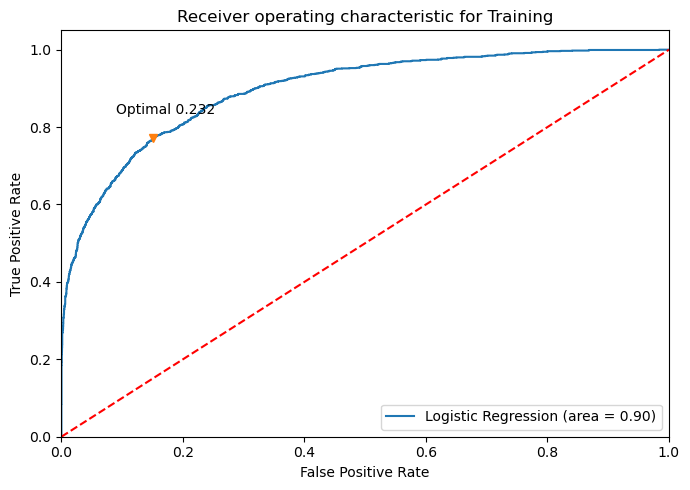

50/50 [==============================] - 0s 1ms/step


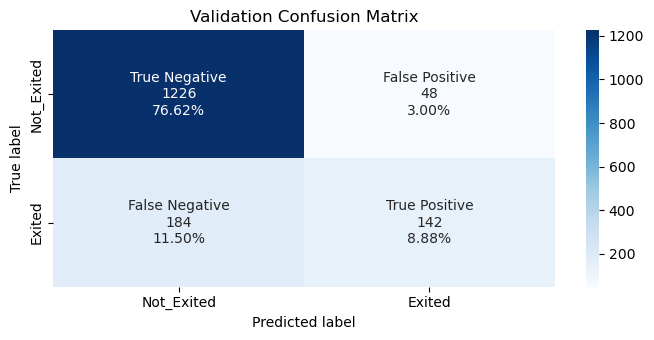

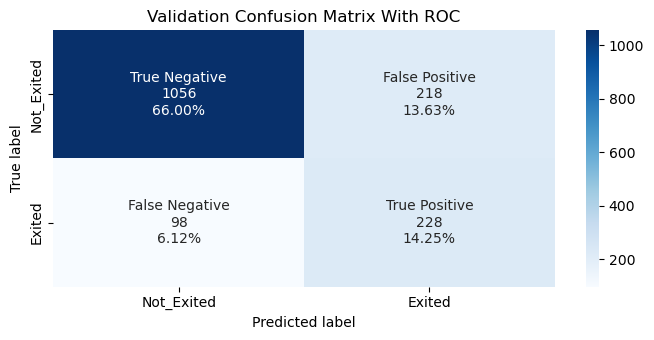

In [81]:
# Output confusion matrix for validation with and without ROC threshold
roc_results["Mod 2e"] = make_roc_curve(model_2e, X_train, y_train)
make_confusion_matrix_with_roc(model_2e, X_val, y_val, roc_results["Mod 2e"])

# Evaluate model performance for test and test with ROC threshold
model_2e_val = model_performance_classification(model_2e, X_val, y_val)
model_2e_val_optimal_roc = model_performance_classification(model_2e, X_val, y_val, roc_results["Mod 2e"])

In [82]:
# Output classification reports for test with ROC threshold
make_classification_report(model_2e, X_val, y_val, title_suffix='Validation with ROC Threshold', \
                           threshold=roc_results["Mod 2e"])

50/50 [==============================] - 0s 669us/step


,precision,recall,f1-score,support
0,0.915078,0.828885,0.869852,1274.000000
1,0.511211,0.699387,0.590674,326.000000
accuracy,0.802500,0.802500,0.802500,0.802500
macro avg,0.713144,0.764136,0.730263,1600.000000
weighted avg,0.832790,0.802500,0.812969,1600.000000


#### Observations
- The Model 2e Recall score post ROC threshold improved to .699.
- The ROC threshold came back at .232 for the optimal value
- The False Negative rate dropped from 11.5% to to 6.12% for Model 2e. 
- In addition False Positives did jump to 13.63% from 3.00% a ~4x increase while Precision declined from .747 to .511.

In [83]:
# add training results 
training_results["Mod 2e"] = model_2e_train.T

# add validation results 
validation_results["Mod 2e"] = model_2e_val.T
validation_results["Mod 2e ROC"] = model_2e_val_optimal_roc.T

### Model Improvement: Neural Network model with Adam and Dropout

In [84]:
# Leverage base model and add dropout with a rate of .45
model_3 = build_basic_model(dropout_rate=0.45)

In [85]:
learning_rate = 1e-3
model_3.compile(optimizer=Adam(learning_rate=learning_rate),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [86]:
# Output summary of the model
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                768       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,881
Trainable params: 2,881
Non-trainable params: 0
_________________________________________________________________


In [87]:
# Train the model
epochs = 100
batch_size = 32
history= model_3.fit(X_train, y_train, verbose = verbose, validation_data=(X_val,y_val), epochs= epochs,
          batch_size=batch_size)

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.5004 - accuracy: 0.7927 - val_loss: 0.4462 - val_accuracy: 0.7981
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4621 - accuracy: 0.7998 - val_loss: 0.4373 - val_accuracy: 0.8025
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.8005 - val_loss: 0.4337 - val_accuracy: 0.8037
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4490 - accuracy: 0.8047 - val_loss: 0.4358 - val_accuracy: 0.8138
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4400 - accuracy: 0.8116 - val_loss: 0.4261 - val_accuracy: 0.8094
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.8122 - val_loss: 0.4233 - val_accuracy: 0.8213
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.8169 - val_loss: 0.4182 - val_accuracy: 0.8263

Epoch 58/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 0.8584 - val_loss: 0.3488 - val_accuracy: 0.8575
Epoch 59/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 0.8608 - val_loss: 0.3489 - val_accuracy: 0.8562
Epoch 60/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3439 - accuracy: 0.8603 - val_loss: 0.3489 - val_accuracy: 0.8600
Epoch 61/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3387 - accuracy: 0.8634 - val_loss: 0.3457 - val_accuracy: 0.8587
Epoch 62/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3486 - accuracy: 0.8589 - val_loss: 0.3447 - val_accuracy: 0.8625
Epoch 63/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8616 - val_loss: 0.3461 - val_accuracy: 0.8581
Epoch 64/100
200/200 [==============================] - 0s 1ms/step - loss: 0.3417 - accuracy: 0.8595 - val_loss: 0.3466 - val_accuracy:

In [88]:
# Evaluate model performance with for train
model_3_train = model_performance_classification(model_3, X_train, y_train)

200/200 [==============================] - 0s 688us/step


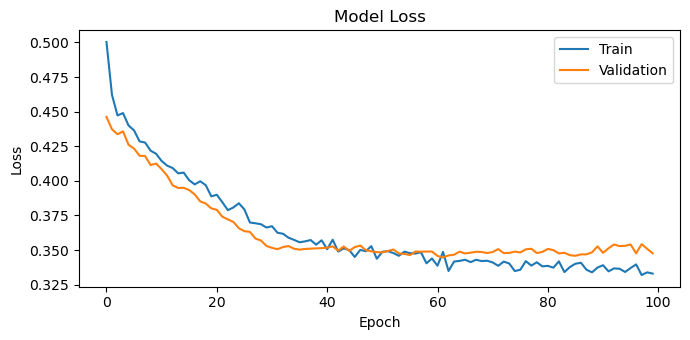

200/200 [==============================] - 0s 635us/step


,precision,recall,f1-score,support
0,0.881058,0.973901,0.925156,5096.000000
1,0.826597,0.486196,0.612265,1304.000000
accuracy,0.874531,0.874531,0.874531,0.874531
macro avg,0.853828,0.730049,0.768710,6400.000000
weighted avg,0.869962,0.874531,0.861404,6400.000000


50/50 [==============================] - 0s 879us/step


,precision,recall,f1-score,support
0,0.868680,0.970958,0.916976,1274.000000
1,0.789773,0.426380,0.553785,326.000000
accuracy,0.860000,0.860000,0.860000,0.860000
macro avg,0.829226,0.698669,0.735380,1600.000000
weighted avg,0.852602,0.860000,0.842975,1600.000000


In [89]:
# Output loss curve
output_loss(history)

# Output classification reports for train and validation
make_classification_report(model_3, X_train, y_train, title_suffix='Train')
make_classification_report(model_3, X_val, y_val, title_suffix='Validation')

#### Observations
- The loss curve shows some slight overfitting between training and validtion but dropout clearly improved the previous model. 
- Model 3 recall score is .4263 pre ROC.

200/200 [==============================] - 0s 697us/step


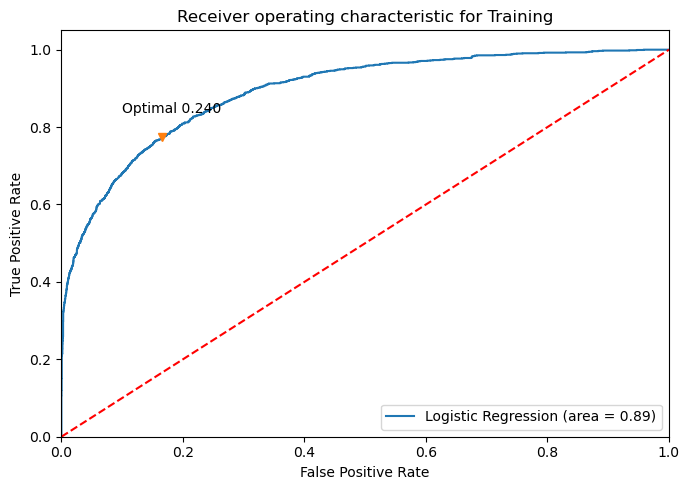

50/50 [==============================] - 0s 1ms/step


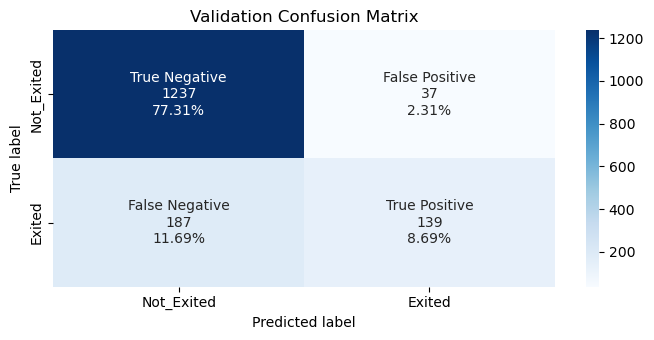

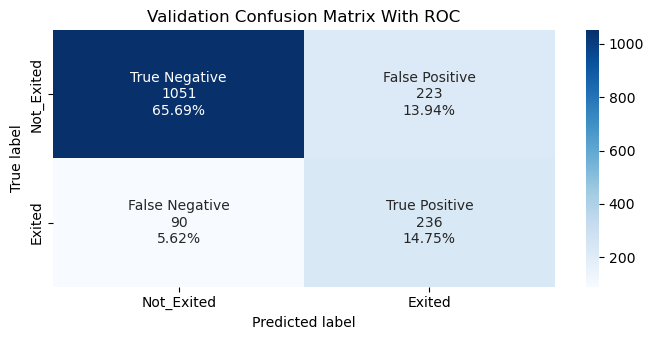

In [90]:
# Output confusion matrix for validation with and without ROC threshold
roc_results["Mod 3"] = make_roc_curve(model_3, X_train, y_train)
make_confusion_matrix_with_roc(model_3, X_val, y_val, roc_results["Mod 3"])

# Evaluate model performance for test and test with ROC threshold
model_3_val = model_performance_classification(model_3, X_val, y_val)
model_3_val_optimal_roc = model_performance_classification(model_3, X_val, y_val, roc_results["Mod 3"])

In [91]:
# Output classification reports for test with ROC threshold
make_classification_report(model_3, X_val, y_val, title_suffix='Validation with ROC Threshold', \
                           threshold=roc_results["Mod 3"])

50/50 [==============================] - 0s 891us/step


,precision,recall,f1-score,support
0,0.921122,0.824961,0.870393,1274.000000
1,0.514161,0.723926,0.601274,326.000000
accuracy,0.804375,0.804375,0.804375,0.804375
macro avg,0.717642,0.774444,0.735834,1600.000000
weighted avg,0.838204,0.804375,0.815560,1600.000000


#### Observations
- The Model 3 Recall score post ROC threshold improved to .723.
- The ROC threshold came back at .240 for the optimal value
- The False Negative rate dropped from 11.69% to to 5.62% for Model 3. 
- In addition False Positives did jump to 13.94% from 2.31% a ~5x increase while Precision declined from .789 to .514.

In [92]:
# add training results 
training_results["Mod 3"] = model_3_train.T

# add validation results 
validation_results["Mod 3"] = model_3_val.T
validation_results["Mod 3 ROC"] = model_3_val_optimal_roc.T

### Model Improvement: Neural Network model with Hyperparameter tuning (add dropout)

### Callback ReduceLROnPlateau

- The remainder of the models will employ the callback ReduceLROnPlateau. 
- ReduceLROnPlateau is a callback that dynamically adjusts the learning rate of a neural network during training. This callback reduces the learning rate when progress slows, during training and it can help the model learn more effectively.
- It adapts the learning_rate dynamically based on model performance.
- Employing this callback can also allow faster convergence.

In [93]:
# Clear the session before modelling
backend.clear_session()
# Create a new hypermodel with max_neurons of 256 with dropout layers that we be optimized by Keras Tuner
hypermodel = INNHyperModelDropout(256)

# Get the best model and hyperparameters using Keras Tuner and cross validation
model_4,model_4_hp = get_hypermodel_cv(hypermodel, X_train, y_train, X_val, y_val, 'INN_1')

# Output the main hyperparms from the hypermodel
batch_size = model_4_hp.get('batch_size')
num_layers = model_4_hp.get('num_layers')
adam_learning_rate = model_4_hp.get('batch_size')
dropout_rate = model_4_hp.get('dropout_rate')
print('batch size:{} num_layers:{} Learning rate:{}, dropout rate:{}'.format(batch_size, num_layers, 
                                                                            adam_learning_rate, dropout_rate))

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
batch_size (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64], 'ordered': True}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': Non

In [94]:
# Output summary of the model
model_4.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 48)                  576       
                                                                 
 dropout (Dropout)           (32, 48)                  0         
                                                                 
 dense_1 (Dense)             (32, 48)                  2352      
                                                                 
 dropout_1 (Dropout)         (32, 48)                  0         
                                                                 
 dense_2 (Dense)             (32, 80)                  3920      
                                                                 
 dropout_2 (Dropout)         (32, 80)                  0         
                                                                 
 dense_3 (Dense)             (32, 80)                  6

In [95]:
# Train the model
epochs = 100
history= model_4.fit(X_train, y_train, verbose = verbose, validation_data=(X_val,y_val), epochs=epochs,
                    callbacks=ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 2, 
                                                min_lr=0.00001), batch_size=batch_size)

Epoch 1/100
400/400 [==============================] - 1s 2ms/step - loss: 0.4667 - accuracy: 0.7962 - val_loss: 0.4319 - val_accuracy: 0.7962 - lr: 0.0010
Epoch 2/100
400/400 [==============================] - 1s 1ms/step - loss: 0.4278 - accuracy: 0.8005 - val_loss: 0.4104 - val_accuracy: 0.8250 - lr: 0.0010
Epoch 3/100
400/400 [==============================] - 1s 1ms/step - loss: 0.4119 - accuracy: 0.8361 - val_loss: 0.3905 - val_accuracy: 0.8356 - lr: 0.0010
Epoch 4/100
400/400 [==============================] - 1s 1ms/step - loss: 0.4014 - accuracy: 0.8398 - val_loss: 0.3707 - val_accuracy: 0.8556 - lr: 0.0010
Epoch 5/100
400/400 [==============================] - 1s 1ms/step - loss: 0.3921 - accuracy: 0.8423 - val_loss: 0.3656 - val_accuracy: 0.8550 - lr: 0.0010
Epoch 6/100
400/400 [==============================] - 1s 1ms/step - loss: 0.3781 - accuracy: 0.8452 - val_loss: 0.3746 - val_accuracy: 0.8444 - lr: 0.0010
Epoch 7/100
400/400 [==============================] - 1s 1ms/st

In [96]:
# Evaluate model performance with for train
model_4_train = model_performance_classification(model_4, X_train, y_train)

200/200 [==============================] - 0s 656us/step


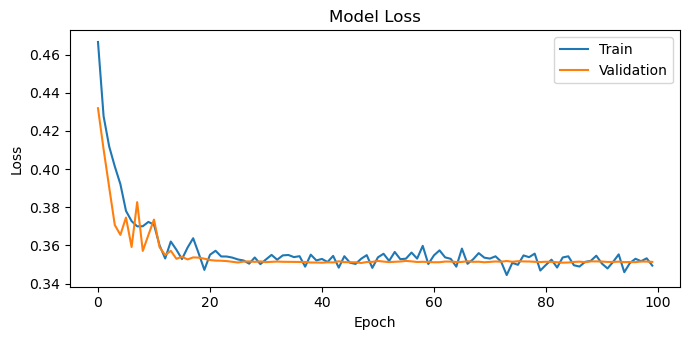

200/200 [==============================] - 0s 660us/step


,precision,recall,f1-score,support
0,0.876980,0.977826,0.924661,5096.000000
1,0.842618,0.463957,0.598417,1304.000000
accuracy,0.873125,0.873125,0.873125,0.873125
macro avg,0.859799,0.720891,0.761539,6400.000000
weighted avg,0.869979,0.873125,0.858189,6400.000000


50/50 [==============================] - 0s 751us/step


,precision,recall,f1-score,support
0,0.864395,0.975667,0.916667,1274.000000
1,0.808642,0.401840,0.536885,326.000000
accuracy,0.858750,0.858750,0.858750,0.858750
macro avg,0.836518,0.688754,0.726776,1600.000000
weighted avg,0.853035,0.858750,0.839286,1600.000000


In [97]:
# Output loss curve
output_loss(history)

# Output classification reports for train and validation
make_classification_report(model_4, X_train, y_train, title_suffix='Train')
make_classification_report(model_4, X_val, y_val, title_suffix='Validation')

#### Observations
- The validation loss curve follows the training curve fairly well even though it is jagged here and there but in general tracks the curve indicating and there is no overfitting or underfitting.
- Model 4 recall score is .401.

200/200 [==============================] - 0s 643us/step


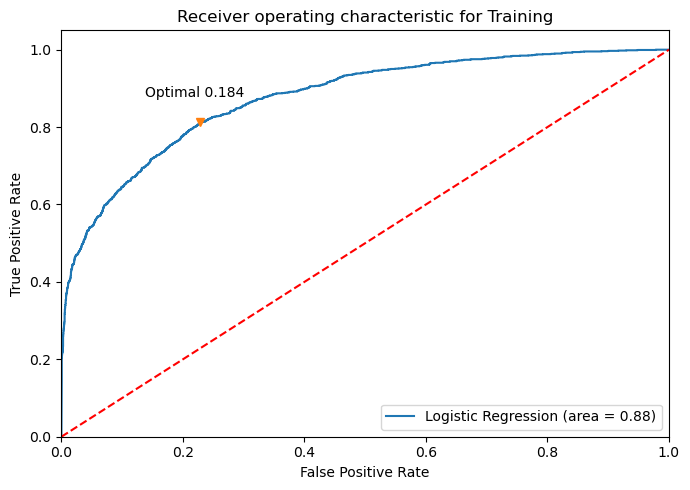

50/50 [==============================] - 0s 1ms/step


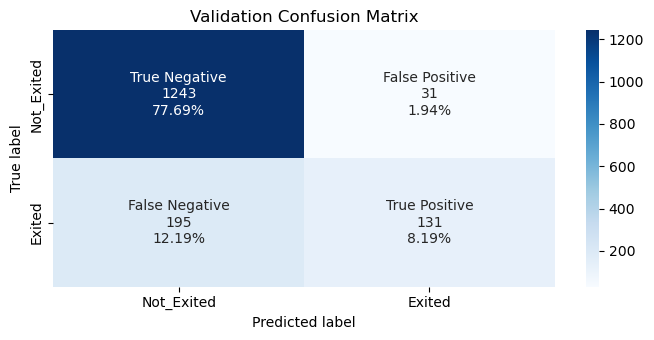

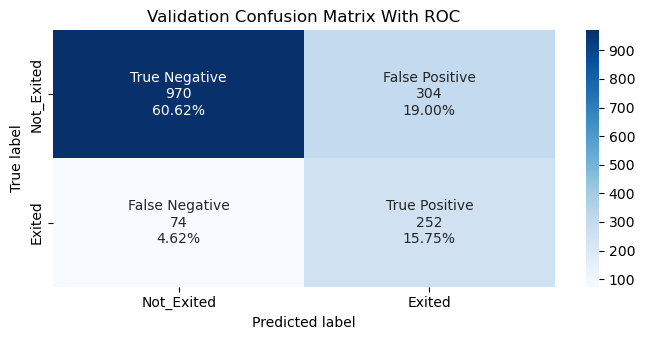

In [98]:
# Output confusion matrix for validation with and without ROC threshold
roc_results["Mod 4"] = make_roc_curve(model_4, X_train, y_train)
make_confusion_matrix_with_roc(model_4, X_val, y_val, roc_results["Mod 4"])

# Evaluate model performance for test and test with ROC threshold
model_4_val = model_performance_classification(model_4, X_val, y_val)
model_4_val_optimal_roc = model_performance_classification(model_4, X_val, y_val, roc_results["Mod 4"])

In [99]:
# Output classification reports for test with ROC threshold
make_classification_report(model_4, X_val, y_val, title_suffix='Validation with ROC Threshold', \
                           threshold=roc_results["Mod 4"])

50/50 [==============================] - 0s 838us/step


,precision,recall,f1-score,support
0,0.929119,0.761381,0.836928,1274.000000
1,0.453237,0.773006,0.571429,326.000000
accuracy,0.763750,0.763750,0.763750,0.763750
macro avg,0.691178,0.767194,0.704178,1600.000000
weighted avg,0.832158,0.763750,0.782833,1600.000000


#### Observations
- The Model 4 Recall score post ROC threshold improved to .773.
- The ROC threshold came back at .184 for the optimal value.
- The False Negative rate dropped from 12.19% to to 4.62% for Model 4. 
- In addition False Positives did jump to 1.94% from 19% a ~10x increase while Precision declined from .808 to .453.

In [100]:
# add training results 
training_results["Mod 4"] = model_4_train.T

# add validation results 
validation_results["Mod 4"] = model_4_val.T
validation_results["Mod 4 ROC"] = model_4_val_optimal_roc.T

In [101]:
# add training results 
training_results["Mod 4"] = model_4_train.T

# add validation results 
validation_results["Mod 4"] = model_4_val.T
validation_results["Mod 4 ROC"] = model_4_val_optimal_roc.T

### Model Improvement: Neural Network model with balanced data

### Apply Class Weighting

In [102]:
class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                 classes=np.unique(y_train),
                                                 y=y_train.values.reshape(-1))
class_weights = dict(zip(np.unique(y_train), class_weights))
class_weights

{0: 0.6279434850863422, 1: 2.4539877300613497}

In [103]:
# Clear the session before modelling
backend.clear_session()
# Create a new hypermodel based on weights
hypermodel = INNHyperModelReg()

# Get the best model and hyperparameters using Keras Tuner and cross validation
model_5, model_5_hp = get_hypermodel_cv(hypermodel, X_train, y_train, X_val, y_val, 'INN_2_1', class_weight=class_weights)

# Output the three main hyperparms from the hypermodel
batch_size = model_5_hp.get('batch_size')
adam_learning_rate = model_5_hp.get('learning_rate')
num_layers = model_5_hp.get('num_layers')
l2_learning_rate = model_5_hp.get('reg2_learning_rate')
print('batch size:{} num_layers:{} Learning rate:{}, L2 learning rate:{}'.format(batch_size, num_layers, adam_learning_rate, \
                                                                        l2_learning_rate))

Search space summary
Default search space size: 12
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
reg2_learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
batch_size (Choice)
{'default': 8, 'conditions': [], 'values': [8, 16, 32, 64], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 128, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'c

In [104]:
# Output summary of the model
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 80)                  960       
                                                                 
 batch_normalization (BatchN  (32, 80)                 320       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (32, 16)                  1296      
                                                                 
 batch_normalization_1 (Batc  (32, 16)                 64        
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (32, 16)                  272       
                                                                 
 batch_normalization_2 (Batc  (32, 16)                 6

In [105]:
# Train the model
epochs = 100
history= model_5.fit(X_train, y_train, verbose = verbose, validation_data=(X_val,y_val), epochs=epochs,
                    class_weight=class_weights, callbacks=ReduceLROnPlateau(monitor = 'val_loss', 
                              factor = 0.1, patience=2, min_lr=0.00001), batch_size=batch_size)

Epoch 1/100
200/200 [==============================] - 2s 2ms/step - loss: 0.6058 - accuracy: 0.7298 - val_loss: 0.5740 - val_accuracy: 0.7412 - lr: 0.0100
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.6060 - accuracy: 0.7303 - val_loss: 0.5771 - val_accuracy: 0.7563 - lr: 0.0100
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5891 - accuracy: 0.7248 - val_loss: 0.6952 - val_accuracy: 0.6831 - lr: 0.0100
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5566 - accuracy: 0.7411 - val_loss: 0.4976 - val_accuracy: 0.8000 - lr: 1.0000e-03
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5408 - accuracy: 0.7616 - val_loss: 0.5021 - val_accuracy: 0.7831 - lr: 1.0000e-03
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5299 - accuracy: 0.7630 - val_loss: 0.4864 - val_accuracy: 0.7950 - lr: 1.0000e-03
Epoch 7/100
200/200 [==============================]

200/200 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7841 - val_loss: 0.4822 - val_accuracy: 0.7869 - lr: 1.0000e-05
Epoch 53/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4860 - accuracy: 0.7855 - val_loss: 0.4843 - val_accuracy: 0.7862 - lr: 1.0000e-05
Epoch 54/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4910 - accuracy: 0.7763 - val_loss: 0.4833 - val_accuracy: 0.7869 - lr: 1.0000e-05
Epoch 55/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4911 - accuracy: 0.7850 - val_loss: 0.4795 - val_accuracy: 0.7900 - lr: 1.0000e-05
Epoch 56/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4904 - accuracy: 0.7817 - val_loss: 0.4840 - val_accuracy: 0.7869 - lr: 1.0000e-05
Epoch 57/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4843 - accuracy: 0.7858 - val_loss: 0.4856 - val_accuracy: 0.7875 - lr: 1.0000e-05
Epoch 58/100
200/200 [=========================

In [106]:
# Evaluate model performance with for train
model_5_train = model_performance_classification(model_5, X_train, y_train)

200/200 [==============================] - 0s 723us/step


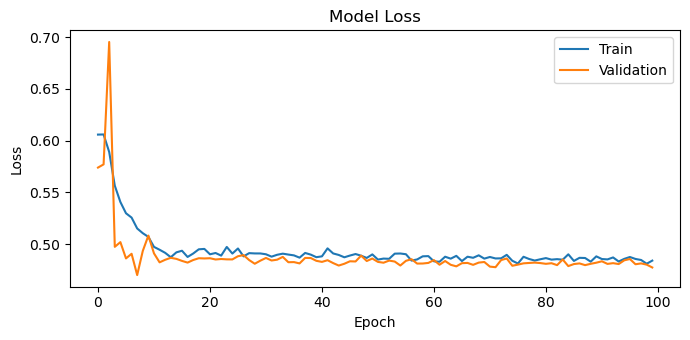

200/200 [==============================] - 0s 653us/step


,precision,recall,f1-score,support
0,0.928587,0.811421,0.866059,5096.000000
1,0.506420,0.756135,0.606583,1304.000000
accuracy,0.800156,0.800156,0.800156,0.800156
macro avg,0.717504,0.783778,0.736321,6400.000000
weighted avg,0.842571,0.800156,0.813191,6400.000000


50/50 [==============================] - 0s 765us/step


,precision,recall,f1-score,support
0,0.919964,0.802983,0.857502,1274.000000
1,0.485656,0.726994,0.582310,326.000000
accuracy,0.787500,0.787500,0.787500,0.787500
macro avg,0.702810,0.764988,0.719906,1600.000000
weighted avg,0.831474,0.787500,0.801432,1600.000000


In [107]:
# Output loss curve
output_loss(history)

# Output classification reports for train and validation
make_classification_report(model_5, X_train, y_train, title_suffix='Train')
make_classification_report(model_5, X_val, y_val, title_suffix='Validation')

#### Observations
- The validation loss curve follows the training curve fairly well even though it is jagged here and there but in general tracks the curve indicating and there is no overfitting or underfitting.
- Model 5 recall score is .726.

200/200 [==============================] - 0s 637us/step


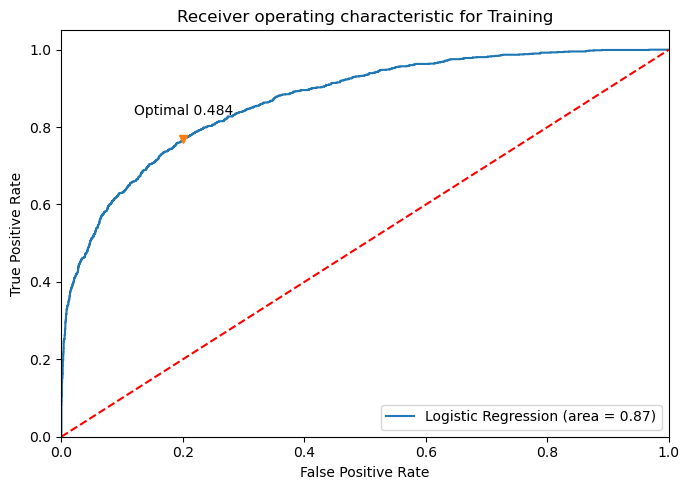

50/50 [==============================] - 0s 837us/step


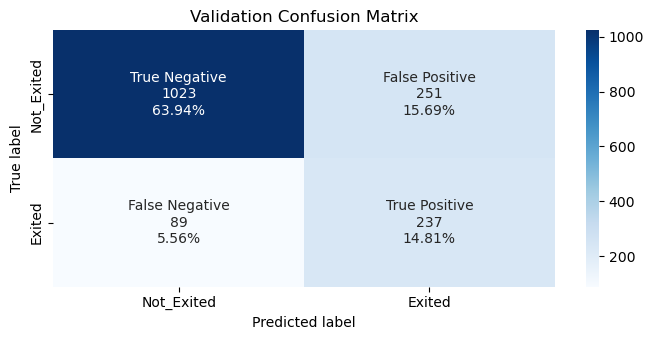

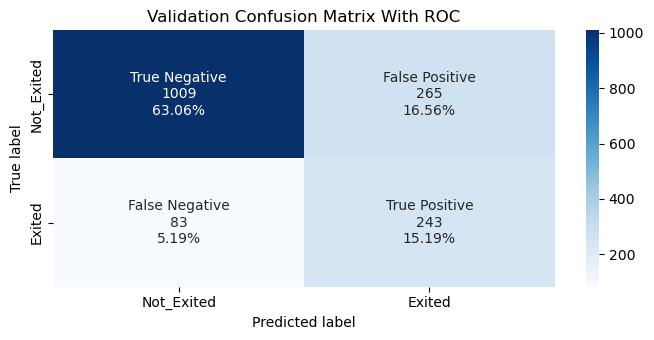

In [108]:
# Output confusion matrix for validation with and without ROC threshold
roc_results["Mod 5"] = make_roc_curve(model_5, X_train, y_train)
make_confusion_matrix_with_roc(model_5, X_val, y_val, roc_results["Mod 5"])

# Evaluate model performance for test and test with ROC threshold
model_5_val = model_performance_classification(model_5, X_val, y_val)
model_5_val_optimal_roc = model_performance_classification(model_5, X_val, y_val, roc_results["Mod 5"])

In [109]:
# Output classification reports for test with ROC threshold
make_classification_report(model_5, X_val, y_val, title_suffix='Validation with ROC Threshold', \
                           threshold=roc_results["Mod 5"])

50/50 [==============================] - 0s 751us/step


,precision,recall,f1-score,support
0,0.923993,0.791994,0.852916,1274.000000
1,0.478346,0.745399,0.582734,326.000000
accuracy,0.782500,0.782500,0.782500,0.782500
macro avg,0.701170,0.768696,0.717825,1600.000000
weighted avg,0.833192,0.782500,0.797867,1600.000000


#### Observations
- The Model 5 Recall score post ROC threshold improved to .745.
- The ROC threshold came back at .484 for the optimal value.
- The False Negative rate dropped from 5.56% to to 5.19% for Model 5. 
- In addition False Positives did jump to 16.56% from 15.69% while Precision declined from .485
to .478.

In [110]:
# add training results 
training_results["Mod 5"] = model_5_train.T

# add validation results 
validation_results["Mod 5"] = model_5_val.T
validation_results["Mod 5 ROC"] = model_5_val_optimal_roc.T

### Apply SMOTE

In [111]:
# transform the dataset
oversample = SMOTE(random_state=seed)
X_train_sampled, y_train_sampled = oversample.fit_resample(X_train, y_train)
print('X_train_sampled shape {}'.format(X_train_sampled.shape))
print('y_train_sampled shape {}'.format(y_train_sampled.shape))
display(y_train_sampled.value_counts(normalize=True))

X_train_sampled shape (10192, 11)
y_train_sampled shape (10192, 1)


Exited
0         0.5
1         0.5
dtype: float64

In [112]:
# Clear the session before modelling
backend.clear_session()
# Create a new hypermodel based on oversampling using a L1/L2 regularizer
hypermodel = INNHyperModelReg(l2=False)

# Get the best model and hyperparameters using Keras Tuner and cross validation
model_6, model_6_hp = get_hypermodel_cv(hypermodel, X_train_sampled, y_train_sampled, X_val, y_val, 'INN_3_1')

# Output the main hyperparms from the hypermodel
batch_size = model_6_hp.get('batch_size')
adam_learning_rate = model_6_hp.get('learning_rate')
num_layers = model_6_hp.get('num_layers')
print('batch size:{} num_layers:{} Learning rate:{}'.format(batch_size, num_layers, adam_learning_rate))

Search space summary
Default search space size: 13
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 10, 'step': 1, 'sampling': 'linear'}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 16, 'max_value': 256, 'step': 32, 'sampling': 'linear'}
units_6

64/64 [==============================] - 1s 2ms/step - loss: 17.7026 - accuracy: 0.8391
batch size:64 num_layers:10 Learning rate:0.001


In [113]:
# Output summary of the model
model_6.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 176)               2112      
                                                                 
 batch_normalization (BatchN  (None, 176)              704       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 48)                8496      
                                                                 
 batch_normalization_1 (Batc  (None, 48)               192       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 16)                784       
                                                                 
 batch_normalization_2 (Batc  (None, 16)               6

In [114]:
# Train the model
epochs = 100
history= model_6.fit(X_train_sampled, y_train_sampled, verbose = verbose, validation_data=(X_val,y_val), epochs=epochs,
                    callbacks=ReduceLROnPlateau(monitor = 'val_loss', 
                              factor = 0.1,patience = 2, min_lr=0.00001), batch_size=batch_size)

Epoch 1/100
160/160 [==============================] - 4s 6ms/step - loss: 9.1304 - accuracy: 0.7781 - val_loss: 4.4959 - val_accuracy: 0.7981 - lr: 0.0010
Epoch 2/100
160/160 [==============================] - 1s 5ms/step - loss: 2.8561 - accuracy: 0.7596 - val_loss: 1.8748 - val_accuracy: 0.7962 - lr: 0.0010
Epoch 3/100
160/160 [==============================] - 1s 5ms/step - loss: 1.2164 - accuracy: 0.7764 - val_loss: 1.1161 - val_accuracy: 0.4231 - lr: 0.0010
Epoch 4/100
160/160 [==============================] - 1s 5ms/step - loss: 0.7694 - accuracy: 0.7861 - val_loss: 0.9266 - val_accuracy: 0.5987 - lr: 0.0010
Epoch 5/100
160/160 [==============================] - 1s 5ms/step - loss: 0.6746 - accuracy: 0.7863 - val_loss: 0.6553 - val_accuracy: 0.8444 - lr: 0.0010
Epoch 6/100
160/160 [==============================] - 1s 5ms/step - loss: 0.6330 - accuracy: 0.7963 - val_loss: 0.7736 - val_accuracy: 0.6700 - lr: 0.0010
Epoch 7/100
160/160 [==============================] - 1s 5ms/st

In [115]:
# Evaluate model performance with for train
model_6_train = model_performance_classification(model_6, X_train, y_train)

200/200 [==============================] - 0s 1ms/step


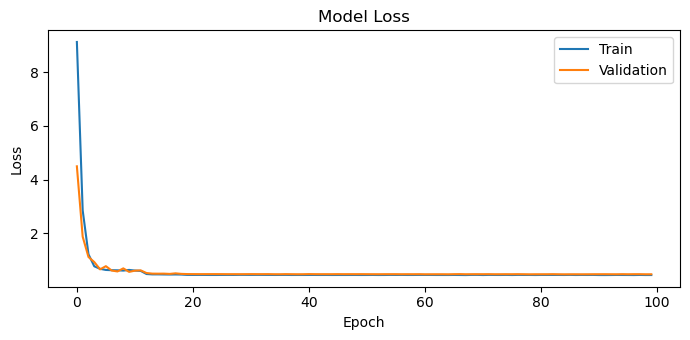

200/200 [==============================] - 0s 1ms/step


,precision,recall,f1-score,support
0,0.926889,0.818485,0.869321,5096.000000
1,0.513158,0.747699,0.608614,1304.000000
accuracy,0.804063,0.804063,0.804063,0.804063
macro avg,0.720023,0.783092,0.738967,6400.000000
weighted avg,0.842591,0.804063,0.816202,6400.000000


50/50 [==============================] - 0s 2ms/step


,precision,recall,f1-score,support
0,0.916449,0.826531,0.869170,1274.000000
1,0.509978,0.705521,0.592021,326.000000
accuracy,0.801875,0.801875,0.801875,0.801875
macro avg,0.713213,0.766026,0.730596,1600.000000
weighted avg,0.833631,0.801875,0.812701,1600.000000


In [116]:
# Output loss curve
output_loss(history)

# Output classification reports for train and validation
make_classification_report(model_6, X_train, y_train, title_suffix='Train')
make_classification_report(model_6, X_val, y_val, title_suffix='Validation')

#### Observations
- The validation loss curve tracks the training curve very nicely indicating and there is no overfitting or underfitting.
- Model 5 recall score is .705.

200/200 [==============================] - 0s 1ms/step


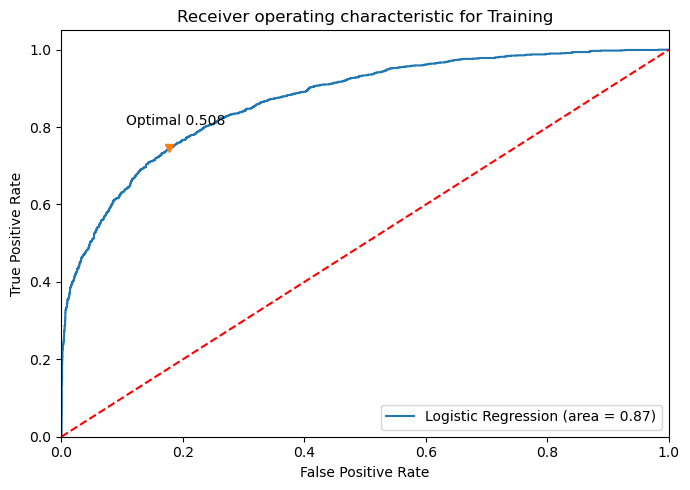

50/50 [==============================] - 0s 1ms/step


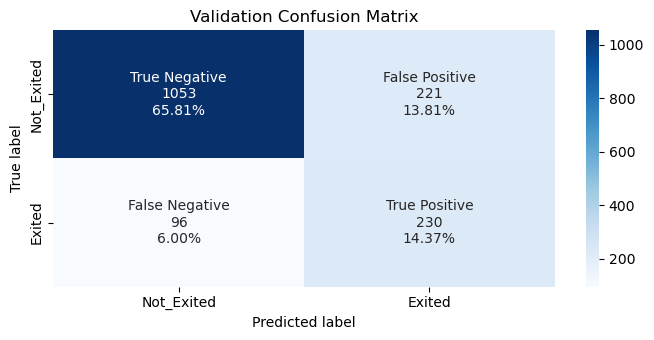

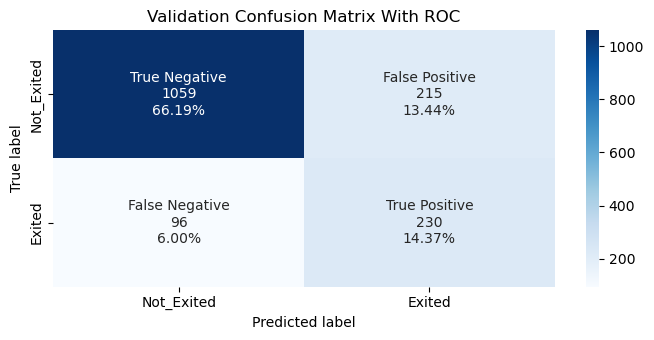

In [117]:
# Output confusion matrix for validation with and without ROC threshold
roc_results["Mod 6"] = make_roc_curve(model_6, X_train, y_train)
make_confusion_matrix_with_roc(model_6, X_val, y_val, roc_results["Mod 6"])

# Evaluate model performance for test and test with ROC threshold
model_6_val = model_performance_classification(model_6, X_val, y_val)
model_6_val_optimal_roc = model_performance_classification(model_6, X_val, y_val, roc_results["Mod 6"])

In [118]:
# Output classification reports for test with ROC threshold
make_classification_report(model_6, X_val, y_val, title_suffix='Validation with ROC Threshold', \
                           threshold=roc_results["Mod 6"])

50/50 [==============================] - 0s 1ms/step


,precision,recall,f1-score,support
0,0.916883,0.831240,0.871964,1274.000000
1,0.516854,0.705521,0.596628,326.000000
accuracy,0.805625,0.805625,0.805625,0.805625
macro avg,0.716869,0.768381,0.734296,1600.000000
weighted avg,0.835377,0.805625,0.815864,1600.000000


#### Observations
- The Model 6 Recall score post ROC threshold improved to .705.
- The ROC threshold came back at .508 for the optimal value.
- The False Negative rate was unchanged for Model 6.
- In addition False Positives did jump to 13.81% from 13.44% while Precision increased from .509 to 516.

In [119]:
# add training results 
training_results["Mod 6"] = model_6_train.T

# add validation results 
validation_results["Mod 6"] = model_6_val.T
validation_results["Mod 6 ROC"] = model_6_val_optimal_roc.T

## Stash all the validation and training results in dataframes for comparison

In [120]:
# training performance comparison
models_training_comp_df = pd.concat(
    list(training_results.values()),
    axis=1,
)
models_training_comp_df.columns = list(training_results.keys())
models_training_comp_df = models_training_comp_df.style.set_caption('Training performance comparison')\
                                                 .set_table_styles([{
                                                     'selector': 'caption',
                                                     'props': 'text-align: center;font-size: 1.5em;font-weight:bold;'
                                                 }], overwrite=False)
models_training_comp_df

,Mod 1,Mod 2,Mod 2e,Mod 3,Mod 4,Mod 5,Mod 6
Accuracy,0.819063,0.899219,0.876875,0.874531,0.873125,0.800156,0.804063
Recall,0.210123,0.581288,0.536810,0.486196,0.463957,0.756135,0.747699
Precision,0.681592,0.884481,0.791855,0.826597,0.842618,0.506420,0.513158
F1,0.321219,0.701527,0.639854,0.612265,0.598417,0.606583,0.608614


In [121]:
# validation performance comparison
models_val_comp_df = pd.concat(
    list(validation_results.values()),
    axis=1,
)
models_val_comp_df.columns = list(validation_results.keys())
models_val_comp_style = models_val_comp_df.style.set_caption('Validation performance comparison')\
                                                 .set_table_styles([{
                                                     'selector': 'caption',
                                                     'props': 'text-align: center;font-size: 1.5em;font-weight:bold;'
                                                 }], overwrite=False)
models_val_comp_style

,Mod 1,Mod 1 ROC,Mod 2,Mod 2 ROC,Mod 2e,Mod 2e ROC,Mod 3,Mod 3 ROC,Mod 4,Mod 4 ROC,Mod 5,Mod 5 ROC,Mod 6,Mod 6 ROC
Accuracy,0.817500,0.726250,0.846250,0.810000,0.855000,0.802500,0.860000,0.804375,0.858750,0.763750,0.787500,0.782500,0.801875,0.805625
Recall,0.202454,0.653374,0.401840,0.674847,0.435583,0.699387,0.426380,0.723926,0.401840,0.773006,0.726994,0.745399,0.705521,0.705521
Precision,0.673469,0.395911,0.719780,0.526316,0.747368,0.511211,0.789773,0.514161,0.808642,0.453237,0.485656,0.478346,0.509978,0.516854
F1,0.311321,0.493056,0.515748,0.591398,0.550388,0.590674,0.553785,0.601274,0.536885,0.571429,0.582310,0.582734,0.592021,0.596628


In [122]:
maximum_recall = models_val_comp_df.iloc[1].idxmax()
print("The maximum recall value from the validation dataset is {} from model {}"\
      .format(models_val_comp_df.iloc[1].max(), models_val_comp_df.iloc[1].idxmax()))

The maximum recall value from the validation dataset is 0.7730061349693251 from model Mod 4 ROC


#### Observations
- From the Training Performance Model 5 has the highest Recall followed by Model 6.
- In the Validation Performance the model with the highest Recall without ROC threshold is Model 5.
- The highest recall post ROC thresholding is Model 4 ROC with .773 followed closely by Model 5 ROC with .745.
- Model 4 ROC is a Neural Network model using with hyperparameter tuning, dropout and a ReduceLROnPlateau callback.

## Feature Importance

## SHAP model interpretation
*  (SHapley Additive exPlanations) is a package that is beneficial for explaining models. SHAP values measure the impact each feature has on a prediction the model makes based on game theory.
* The summary plot shows the feature importance in sorted order which helps to identify which features contribute most to a given prediction indicating which aspects of the input data are driving the network's decisions.
* Each feature is listed on the x axis where the bar for each feature shows where a features value is pushing towards Exited (right) or Not Exited (left). The magnitude of value is shown on blue-red scale where blue is a low value and red is a high value. 
* The SHAP values are listed on the y axis where positive SHAP values indicate in this case Exited = 1 or Churned while negative values indicate Exited = 0 or not churned.

  0%|          | 0/2000 [00:00<?, ?it/s]

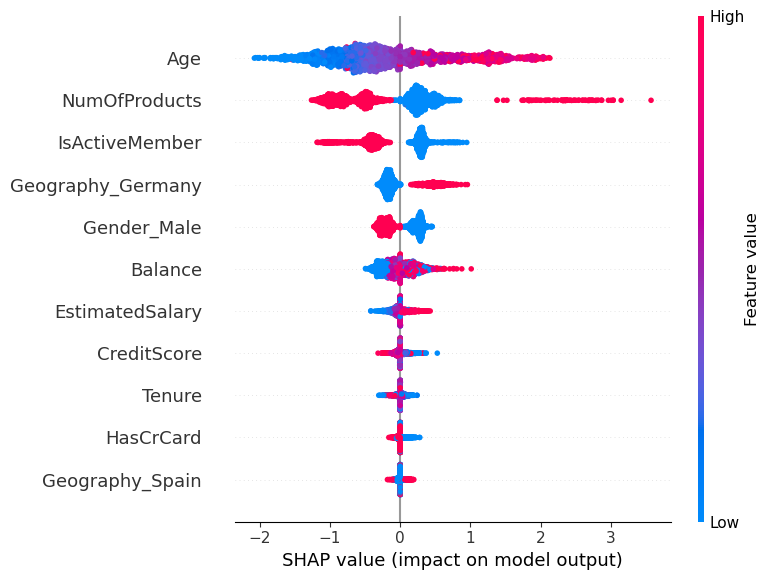

In [123]:
# Create an explainer based on 100 random rows from X_train
random_rows = X_train.sample(n=100, random_state=seed)
explainer = shap.KernelExplainer(model_4, random_rows, link="logit")

# Get 100 random samples from the X_test df
shap_values = explainer.shap_values(X_test, nsamples=100)


shap.initjs()
# Render a summary plot
shap.summary_plot(shap_values[0], X_test)

#### Observations
- The top three most important features in Model 4 ROC based on a small sampling are: Age, NumOfProducts and IsActiveMember.
- In general as Age increases the chance for churning increases as noted in the analysis where there is a band between 35-55 that are high churners.
- NumOfProducts is mixed since its showing a higher NumOfProducts increases and decreases the likelihood of churning. As a reminder in terms of NumOfProducts of those who churned 69.1% has 1 product, 17.0% had 2, 10% had 3 and 2.9% had 4.
- In general members that are Active are not as likely to churn. We found in the analysis that 63% of the churners were not Active.
- The chances of churn increase for customers from Germany in the analysis we found that 39.9% of the churners were from Germany.

In [124]:
df[df['Exited'] == 0]['NumOfProducts'].value_counts(normalize=True)

2    0.532714
1    0.461509
3    0.005777
Name: NumOfProducts, dtype: float64

## Final Model

- Based on the analysis and performance of all the models Model 4 ROC haev has the highest Recall post ROC thresholding of .773.

63/63 [==============================] - 0s 929us/step


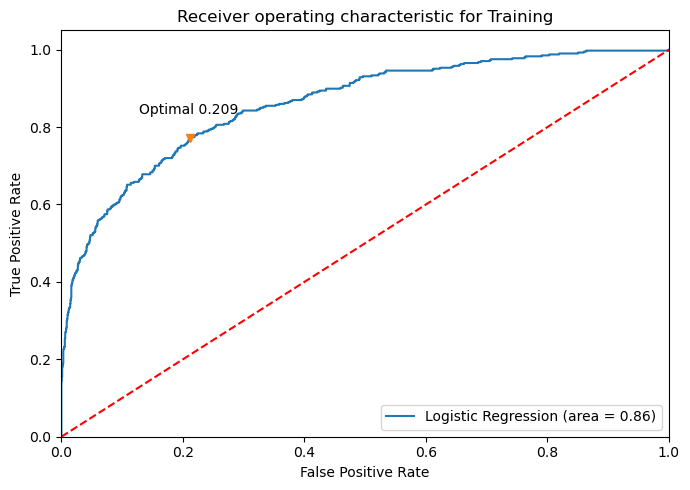

In [125]:
# Output confusion matrix for test with and without ROC threshold
model_4_test_roc = make_roc_curve(model_4, X_test, y_test)

63/63 [==============================] - 0s 885us/step


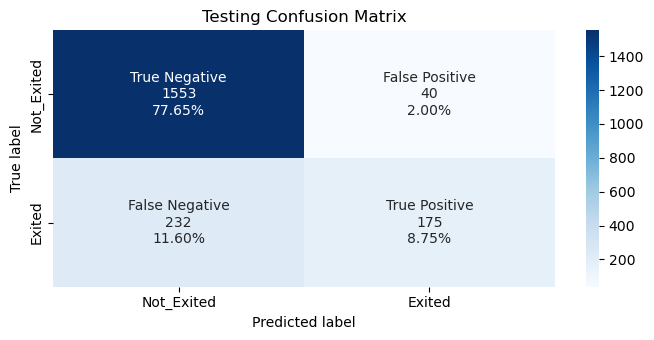

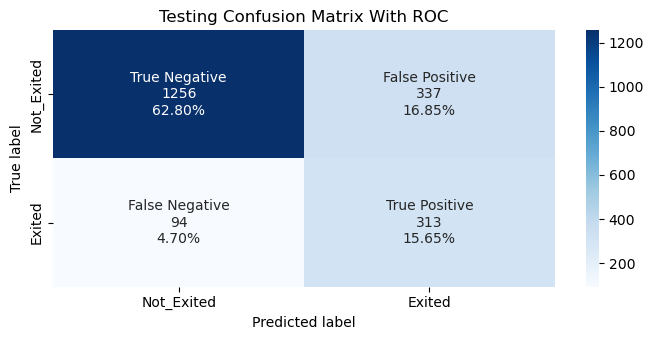

In [126]:
make_confusion_matrix_with_roc(model_4, X_test, y_test, model_4_test_roc, title_prefix='Testing')

In [127]:
# Classification Report for test with the threshold applied
make_classification_report(model_4, X_test, y_test, title_suffix='Test with ROC Threshold', \
                           threshold=model_4_test_roc)

63/63 [==============================] - 0s 697us/step


,precision,recall,f1-score,support
0,0.930370,0.788449,0.853551,1593.000000
1,0.481538,0.769042,0.592242,407.000000
accuracy,0.784500,0.784500,0.784500,0.784500
macro avg,0.705954,0.778746,0.722896,2000.000000
weighted avg,0.839033,0.784500,0.800374,2000.000000


#### Observations
- The Recall post ROC thresholding for test is .769 with an accuracy of .784.
- False negatives dropped from 11.60% to 4.70%

## Actionable Insights and Recommendations
* Model 4 ROC is the suggested model for churn prediction. Recall was selected as the metric since we strive to reduce the cases of the model predicting a customer will not churn and they do in fact churn (False Negative). From the business requirements it was deemed this case was the most costly and thus is minimized.
> * It achieves a Recall Score of .773 on Validation data.
> * It achieves.769 on the test dataset with a False negative rate of 4.70%
> * The top three most important features of this model are Age, NumOfProducts and IsActiveMember.
* In time if the cost of predicting a customer is going to churn and does (False Positive) surpasses this analysis should be redone to stress Precision (minimizing False Positives). 
* The churn rate at the bank is ~20%, according to https://www.qualtrics.com/blog/customer-churn-banking/ normal churn at banks on averages between 5-10%.
* The average mean CreditScore for your customers is 650.28 which according to https://www.equifax.com/personal/education/credit/score/credit-score-ranges/ 
is only a Fair credit score.
* 33% of your customer have a CreditScore considered Fair by Equifax and 18% are either Very Good or Excellent. 
* 55% of your Female customers are churning.
* 55% of your customers that churn are not active (IsActiveMember).

* Deploy customer satisfaction metrics to try to gather further insights on reasons why the bank has such a high churn rate.
* Determine the types of products customers are using particularly those using multiple products could provide further insights on churning details.
* Leveraging customer satisfaction metrics and product usage/satisfaction will provide additional perspective on the overall happiness of your customers and their satisfaction with the services you offer.

### Data Insights
* 33.6% of the individuals with a Fair credit score churned followed by those with a Poor credit score with 25.5%.
* 50% of your customers are from France and of the customers that churn 39.7 are from France and 39.9% are from Germany.
* Approximately 3600 customers have a balance of zero.
* 24.5% (500) of your customers that churned have a zero balance.
* 70.55% of your customers have credit cards.
* 54% of your customers are male.
* 36% (3600) of your customers have a zero balance.  
* All of the customers with NumOfProducts of 4 churned along with a large portion of customers with NumOfProducts of 3.
* Age and Exited have a positive correlation of .29.
* The average balance for customers with NumOfProduct of 3 is 233.48% higher than those who did not exit.

#### Further analysis that can be done:
* This model or an additional model would benefit from product ratings from your customers to determine which products provide benefits and satisfaction to your customers and which do not.
* The model would benefit with more data as well as an Exited variable that covers more than the current six month horizon.
* Any information about product changes, interest rate changes, customer service changes etc. over the last 6 months (the Exited horizon) would be be beneficial towards further enhancing this model.